In [1]:
#Car price prediction
"""1.car_ID
2.symboling
3.CarName
4.fueltype
5.aspiration
6.doornumber
7.carbody
8.drivewheel
9.enginelocation
10.wheelbase
11.carlength
12.carwidth
13.carheight
14.curbweight
15.enginetype
16.cylindernumber
17.enginesize
18.fuelsystem
19.boreratio
20.stroke
21.compressionratio
22.horsepower
23.peakrpm
24.citympg
25.highwaympg
26.price"""

'1.car_ID\n2.symboling\n3.CarName\n4.fueltype\n5.aspiration\n6.doornumber\n7.carbody\n8.drivewheel\n9.enginelocation\n10.wheelbase\n11.carlength\n12.carwidth\n13.carheight\n14.curbweight\n15.enginetype\n16.cylindernumber\n17.enginesize\n18.fuelsystem\n19.boreratio\n20.stroke\n21.compressionratio\n22.horsepower\n23.peakrpm\n24.citympg\n25.highwaympg\n26.price'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import csv

In [5]:
cad = pd.read_csv('CarPricePrediction.csv')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
cad.head()

car_ID  symboling                   CarName fueltype aspiration doornumber      carbody drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg    price
0       1          3        alfa-romero giulia      gas        std        two  convertible        rwd          front       88.6      168.8      64.1       48.8        2548       dohc           four         130       mpfi       3.47    2.68               9.0         111     5000       21          27  13495.0
1       2          3       alfa-romero stelvio      gas        std        two  convertible        rwd          front       88.6      168.8      64.1       48.8        2548       dohc           four         130       mpfi       3.47    2.68               9.0         111     5000       21          27  16500.0
2       3          1  alfa-romero Quadrifoglio      gas        std        two    hatchback        rwd          front       94.5      171.2      65.5       52.4        2823       ohcv            six         152       mpfi       2.68    3.47               9.0         154     5000       19          26  16500.0
3       4          2               audi 100 ls      gas        std       four        sedan        fwd          front       99.8      176.6      66.2       54.3        2337        ohc           four         109       mpfi       3.19    3.40              10.0         102     5500       24          30  13950.0
4       5          2                audi 100ls      gas        std       four        sedan        4wd          front       99.4      176.6      66.4       54.3        2824        ohc           five         136       mpfi       3.19    3.40               8.0         115     5500       18          22  17450.0

In [6]:
#Data Exploration
cad.shape

(205, 26)

In [7]:
cad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [8]:
cad.columns[cad.isnull().any()]


Index([], dtype='object')

In [9]:
cad.apply(lambda x: sum(x.isnull()))
#No null values found for the dataset

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [10]:
cad.apply(lambda x: len(x.unique()))

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [11]:
cad['CarName'].nunique()

147

In [12]:
#cad['CarName'].unique()
categorical_columns = [x for x in cad.dtypes.index if cad.dtypes[x]=='object']
for col in categorical_columns:
    print ('\nFrequency of Categories for varible %s'%col)
    print (cad[col].value_counts())


Frequency of Categories for varible CarName
peugeot 504                        6
toyota corolla                     6
toyota corona                      6
subaru dl                          4
mitsubishi outlander               3
mitsubishi mirage g4               3
mitsubishi g4                      3
toyota mark ii                     3
mazda 626                          3
honda civic                        3
audi 100ls                         2
bmw 320i                           2
subaru                             2
volvo 144ea                        2
toyota corolla liftback            2
nissan clipper                     2
saab 99le                          2
bmw x3                             2
volvo 244dl                        2
peugeot 604sl                      2
volvo 145e (sw)                    2
honda civic cvcc                   2
mazda glc                          2
nissan rogue                       2
volkswagen dasher                  2
porsche cayenne               

In [13]:
#Data Clean Up 
#as we can see there are occurences where the car comany name(CarName) is misspelled, we will replace it with correct name

cad["CarName"] = cad.CarName.map(lambda x: x.split(" ", 1)[0])
# As we have some redundant data in carName lets fix it 
cad.CarName = cad['CarName'].str.lower()
cad['CarName'] = cad['CarName'].str.replace('vw','volkswagen')
cad['CarName'] = cad['CarName'].str.replace('vokswagen','volkswagen')
cad['CarName'] = cad['CarName'].str.replace('toyouta','toyota')
cad['CarName'] = cad['CarName'].str.replace('porcshce','porsche')
cad['CarName'] = cad['CarName'].str.replace('maxda','mazda')
cad['CarName'] = cad['CarName'].str.replace('maxda','mazda')

cad.CarName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [14]:
# Visualising the Data
#Visualising all the Numeric Variables with Pairplot
cad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

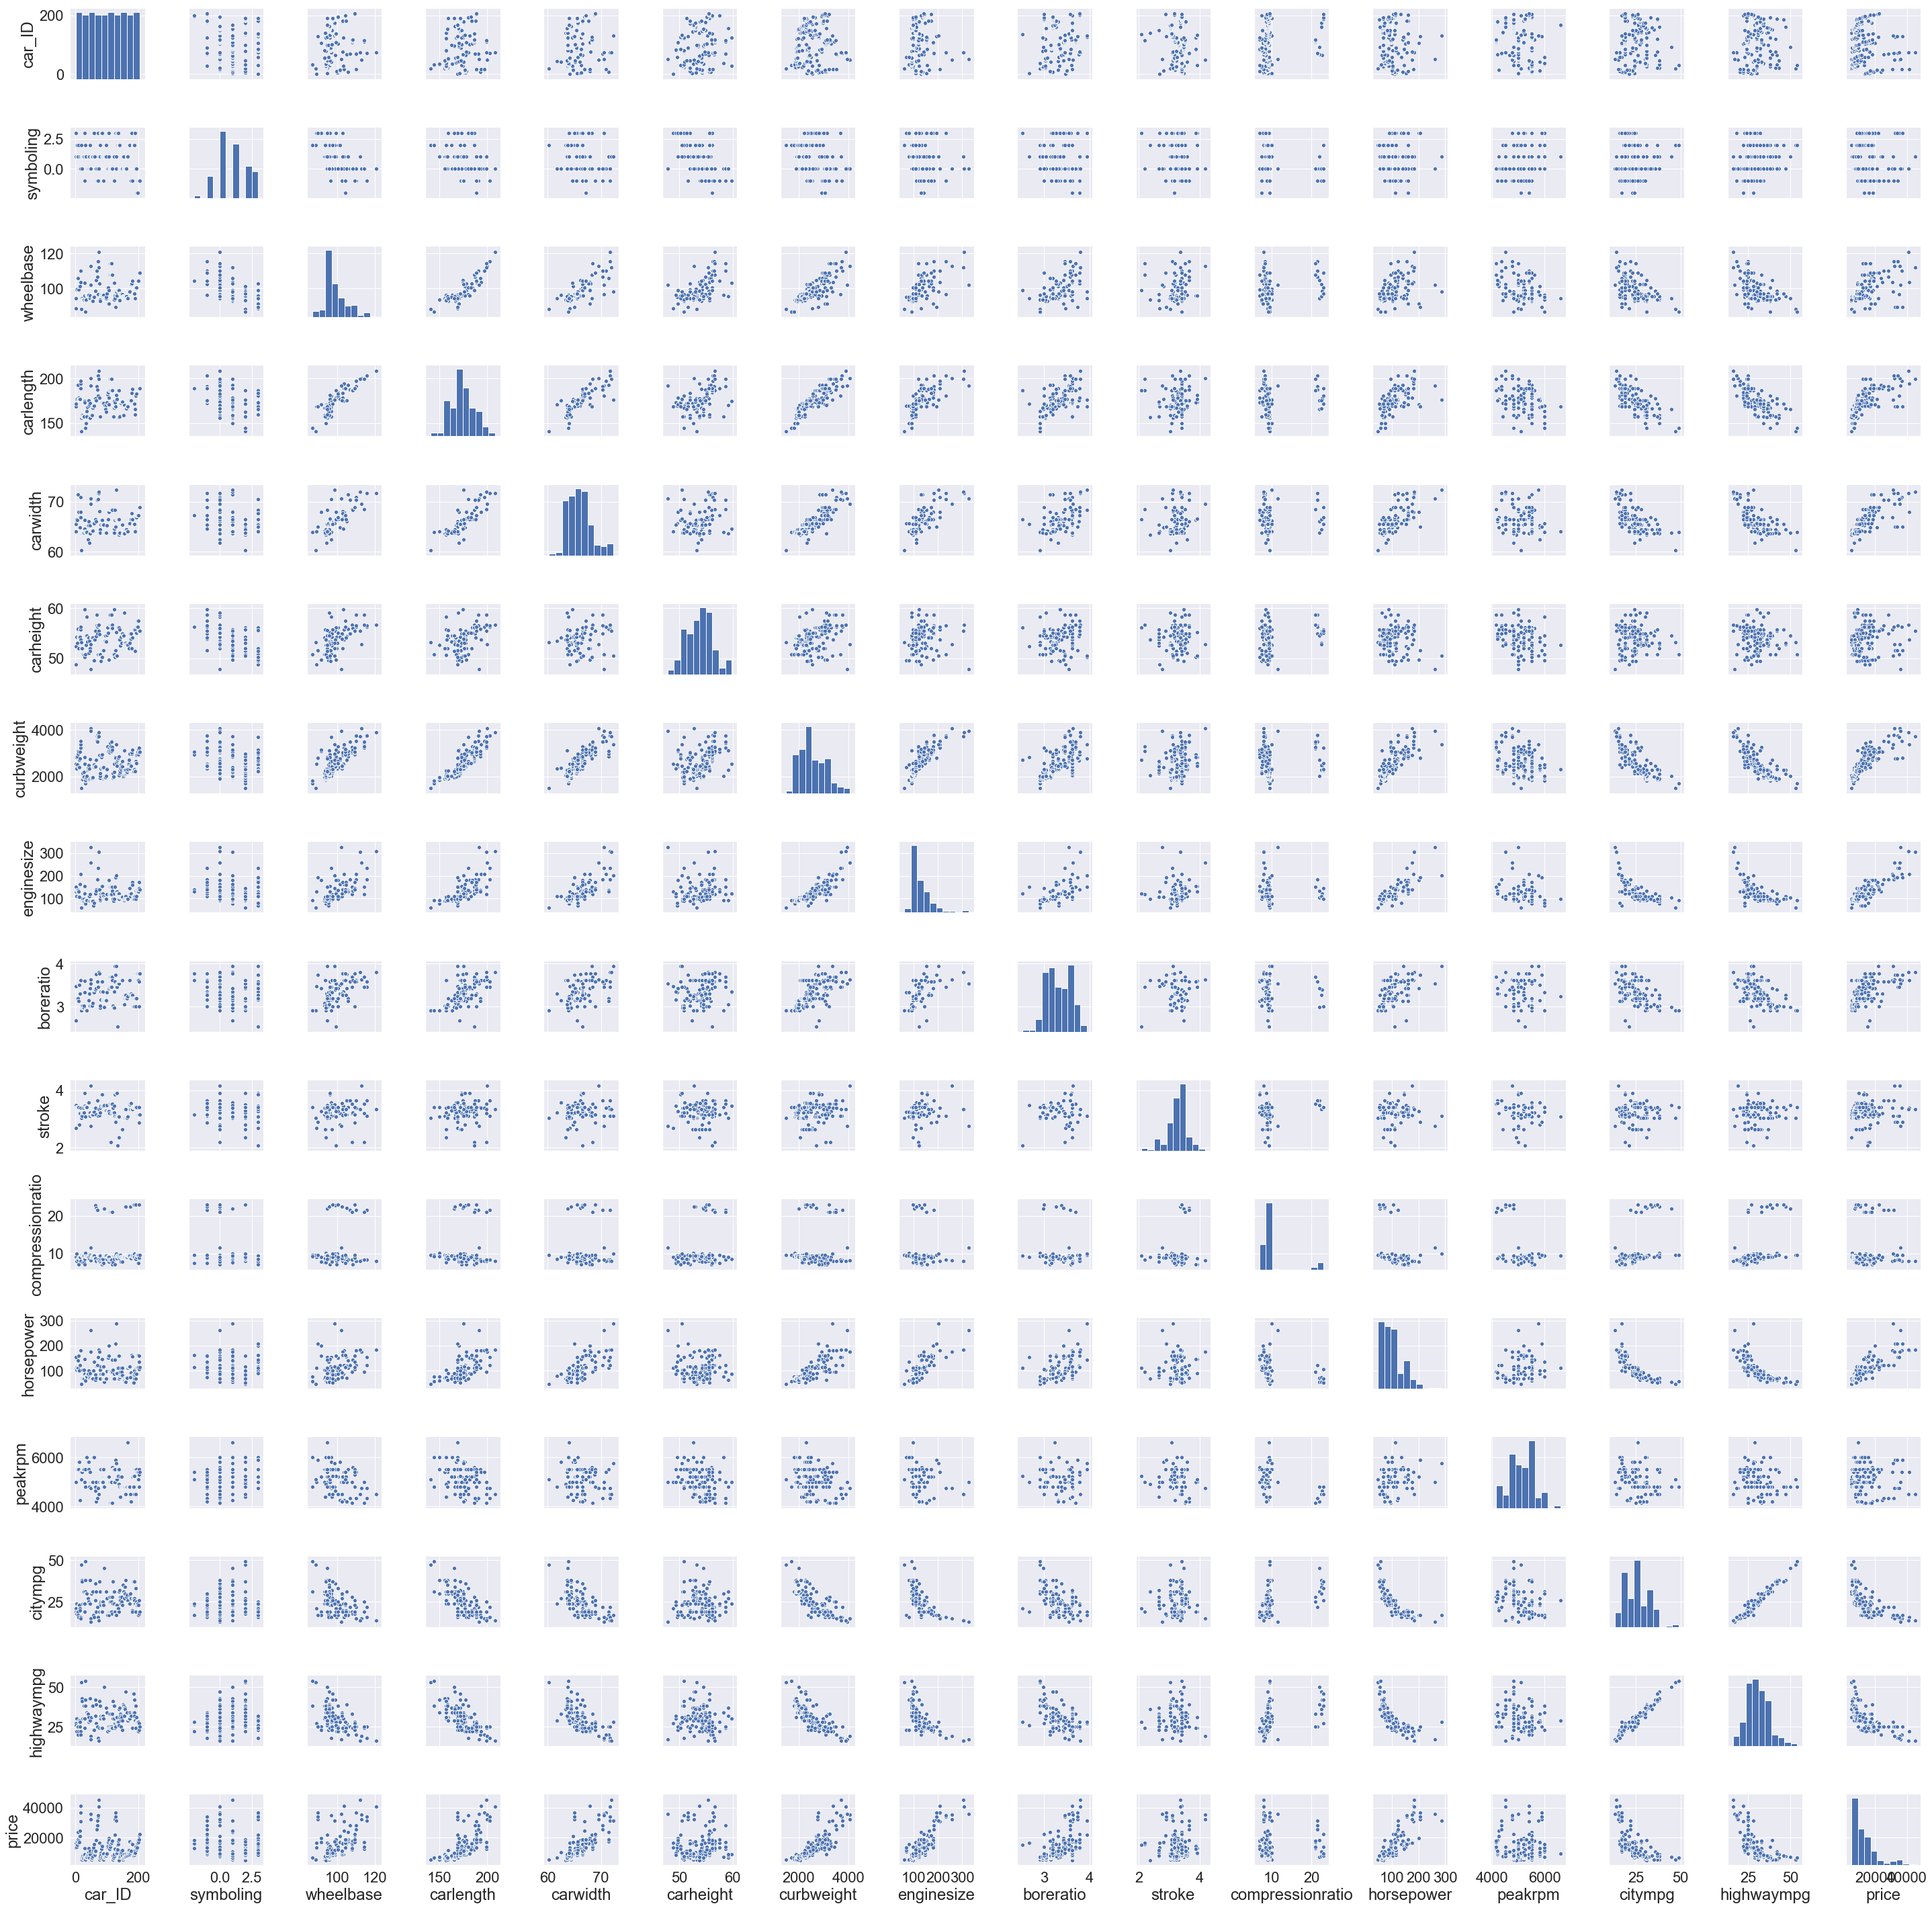

In [15]:
import seaborn as sns
sns.set(font_scale=2)
sns.pairplot(cad)
plt.show()

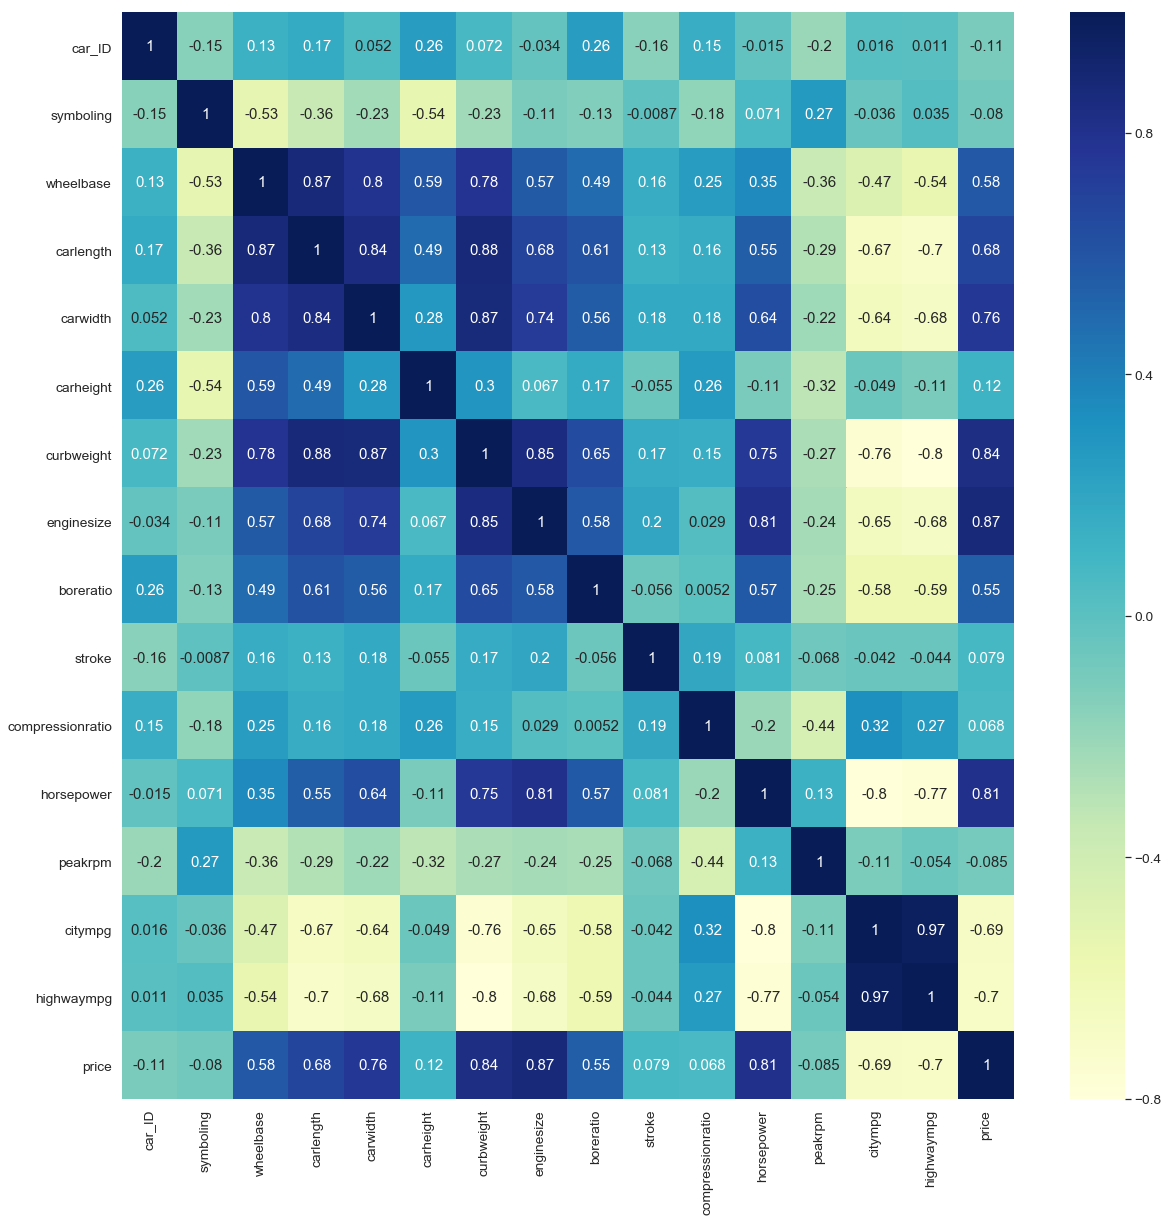

In [16]:
plt.figure(figsize = (20, 20))
sns.set(font_scale=1.25)
sns.heatmap(cad.corr(), annot = True, cmap="YlGnBu")
plt.show()

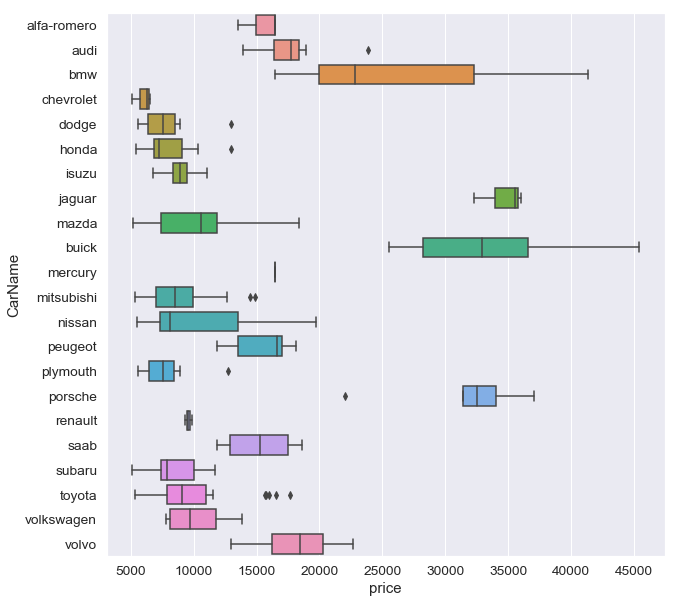

In [17]:
#Visualising the Categorical Variables
#Price Variation for Different Companies
plt.figure(figsize=(10,10))
sns.boxplot(y='CarName', x='price', data = cad)

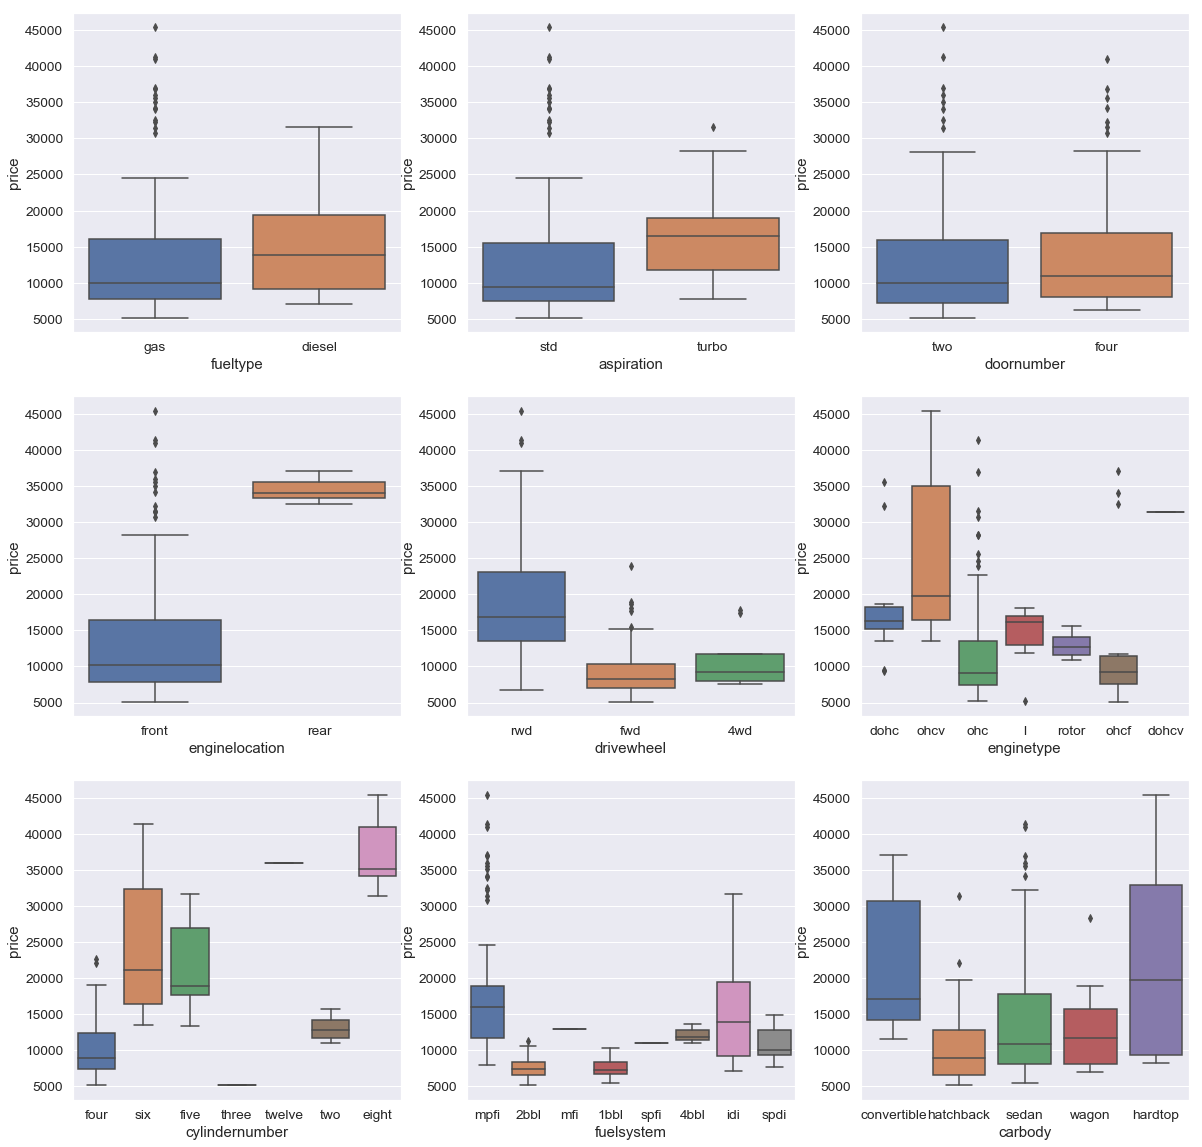

In [18]:
#Price Variation for Car Attributes
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(x='fueltype', y='price', data = cad)

plt.subplot(3,3,2)
sns.boxplot(x='aspiration', y='price', data = cad)

plt.subplot(3,3,3)
sns.boxplot(x='doornumber', y='price', data = cad)

plt.subplot(3,3,4)
sns.boxplot(x='enginelocation', y='price', data = cad)

plt.subplot(3,3,5)
sns.boxplot(x='drivewheel', y='price', data = cad)

plt.subplot(3,3,6)
sns.boxplot(x='enginetype', y='price', data = cad)
plt.subplot(3,3,7)
sns.boxplot(x='cylindernumber', y='price', data = cad)

plt.subplot(3,3,8)
sns.boxplot(x='fuelsystem', y='price', data = cad)

plt.subplot(3,3,9)
sns.boxplot(x='carbody', y='price', data = cad)

In [19]:
#Data Preparation
#these are also categorical value but there is no need of onehot encoder
#Converting Binary variables to Numbers 1,0: fueltype, aspiration, doornumber, enginelocation
cad.drop(['car_ID'], axis =1, inplace = True)
cad.drop(['carwidth','curbweight','wheelbase','highwaympg'], axis =1, inplace = True)
 #Converting Yes to 1 and No to 0
cad['fueltype'] = cad['fueltype'].map({'gas': 1, 'diesel': 0})
cad['aspiration'] = cad['aspiration'].map({'std': 1, 'turbo': 0})
cad['doornumber'] = cad['doornumber'].map({'two': 1, 'four': 0})
cad['enginelocation'] = cad['enginelocation'].map({'front': 1, 'rear': 0})


In [20]:
cad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 21 columns):
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null int64
aspiration          205 non-null int64
doornumber          205 non-null int64
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null int64
carlength           205 non-null float64
carheight           205 non-null float64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
price               205 non-null float64
dtypes: float64(6), int64(9), object(6)
memory usage: 33.7

In [21]:
cag =('CarName','carbody','drivewheel','enginetype','cylindernumber','fuelsystem')

In [22]:
#Creating Dummy Variables all together, concating and Dropping the Columns
from sklearn.preprocessing import LabelEncoder
for cagi in cag:
    lbl = LabelEncoder() 
    lbl.fit(list(cad[cagi].values)) 
    cad[cagi] = lbl.transform(list(cad[cagi].values))
cad 

symboling  CarName  fueltype  aspiration  doornumber  carbody  drivewheel  enginelocation  carlength  carheight  enginetype  cylindernumber  enginesize  fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  citympg      price
0            3        0         1           1           1        0           2               1      168.8       48.8           0               2         130           5       3.47   2.680              9.00         111     5000       21  13495.000
1            3        0         1           1           1        0           2               1      168.8       48.8           0               2         130           5       3.47   2.680              9.00         111     5000       21  16500.000
2            1        0         1           1           1        2           2               1      171.2       52.4           5               3         152           5       2.68   3.470              9.00         154     5000       19  16500.000
3            2        1         1           1           0        3           1               1      176.6       54.3           3               2         109           5       3.19   3.400             10.00         102     5500       24  13950.000
4            2        1         1           1           0        3           0               1      176.6       54.3           3               1         136           5       3.19   3.400              8.00         115     5500       18  17450.000
5            2        1         1           1           1        3           1               1      177.3       53.1           3               1         136           5       3.19   3.400              8.50         110     5500       19  15250.000
6            1        1         1           1           0        3           1               1      192.7       55.7           3               1         136           5       3.19   3.400              8.50         110     5500       19  17710.000
7            1        1         1           1           0        4           1               1      192.7       55.7           3               1         136           5       3.19   3.400              8.50         110     5500       19  18920.000
8            1        1         1           0           0        3           1               1      192.7       55.9           3               1         131           5       3.13   3.400              8.30         140     5500       17  23875.000
9            0        1         1           0           1        2           0               1      178.2       52.0           3               1         131           5       3.13   3.400              7.00         160     5500       16  17859.167
10           2        2         1           1           1        3           2               1      176.8       54.3           3               2         108           5       3.50   2.800              8.80         101     5800       23  16430.000
11           0        2         1           1           0        3           2               1      176.8       54.3           3               2         108           5       3.50   2.800              8.80         101     5800       23  16925.000
12           0        2         1           1           1        3           2               1      176.8       54.3           3               3         164           5       3.31   3.190              9.00         121     4250       21  20970.000
13           0        2         1           1           0        3           2               1      176.8       54.3           3               3         164           5       3.31   3.190              9.00         121     4250       21  21105.000
14           1        2         1           1           0        3           2               1      189.0       55.7           3               3         164           5       3.31   3.190              9.00         121     4250       20  24565.000
15           0        2         1           1        

In [23]:
"""since after labelencoding we got 0,1,2,3,4,5.. value for categorical col so before modeling the data 
we need to do one hot encoding"""
#cad= pd.get_dummies(cad) ##can do by using this code as well
##cad.columns

#One Hot Coding:
cad = pd.get_dummies(cad, columns=['CarName','carbody','drivewheel','enginetype','cylindernumber','fuelsystem'])
cad

symboling  fueltype  aspiration  doornumber  enginelocation  carlength  carheight  enginesize  boreratio  stroke  compressionratio  horsepower  peakrpm  citympg      price  CarName_0  CarName_1  CarName_2  CarName_3  CarName_4  CarName_5  CarName_6  CarName_7  CarName_8  CarName_9  CarName_10  CarName_11  CarName_12  CarName_13  CarName_14  CarName_15  CarName_16  CarName_17  CarName_18  CarName_19  CarName_20  CarName_21  carbody_0  carbody_1  carbody_2  carbody_3  carbody_4  drivewheel_0  drivewheel_1  drivewheel_2  enginetype_0  enginetype_1  enginetype_2  enginetype_3  enginetype_4  enginetype_5  enginetype_6  cylindernumber_0  cylindernumber_1  cylindernumber_2  cylindernumber_3  cylindernumber_4  cylindernumber_5  cylindernumber_6  fuelsystem_0  fuelsystem_1  fuelsystem_2  fuelsystem_3  fuelsystem_4  fuelsystem_5  fuelsystem_6  fuelsystem_7
0            3         1           1           1               1      168.8       48.8         130       3.47   2.680              9.00         111     5000       21  13495.000          1          0          0          0          0          0          0          0          0          0           0           0           0           0           0           0           0           0           0           0           0           0          1          0          0          0          0             0             0             1             1             0             0             0             0             0             0                 0                 0                 1                 0                 0                 0                 0             0             0             0             0             0             1             0             0
1            3         1           1           1               1      168.8       48.8         130       3.47   2.680              9.00         111     5000       21  16500.000          1          0          0          0          0          0          0          0          0          0           0           0           0           0           0           0           0           0           0           0           0           0          1          0          0          0          0             0             0             1             1             0             0             0             0             0             0                 0                 0                 1                 0                 0                 0                 0             0             0             0             0             0             1             0             0
2            1         1           1           1               1      171.2       52.4         152       2.68   3.470              9.00         154     5000       19  16500.000          1          0          0          0          0          0          0          0          0          0           0           0           0           0           0           0           0           0           0           0           0           0          0          0          1          0          0             0             0             1             0             0             0             0             0             1             0                 0                 0                 0                 1                 0                 0                 0             0             0             0             0             0             1             0             0
3            2         1           1           0               1      176.6       54.3         109       3.19   3.400             10.00         102     5500       24  13950.000          0          1          0          0          0          0          0          0          0          0           0           0           0           0           0           0           0           0           0           0           0           0          0          0          0          1          0             0             1             0             0        

In [24]:
cad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 67 columns):
symboling           205 non-null int64
fueltype            205 non-null int64
aspiration          205 non-null int64
doornumber          205 non-null int64
enginelocation      205 non-null int64
carlength           205 non-null float64
carheight           205 non-null float64
enginesize          205 non-null int64
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
price               205 non-null float64
CarName_0           205 non-null uint8
CarName_1           205 non-null uint8
CarName_2           205 non-null uint8
CarName_3           205 non-null uint8
CarName_4           205 non-null uint8
CarName_5           205 non-null uint8
CarName_6           205 non-null uint8
CarName_7           205 n

In [25]:
cad.shape

(205, 67)

In [26]:
#Rescaling the the numericFeatures apart from ranging 0 to 1
caf=['symboling', 'carlength', 'carheight','enginesize','boreratio', 'stroke','compressionratio','horsepower','peakrpm','citympg','price']

In [27]:
# Normalising only the numeric fields 
normalised_cad = cad[caf].apply(lambda x: (x-np.mean(x))/ (max(x) - min(x)))
normalised_cad.head()

cad['symboling'] = normalised_cad['symboling']
cad['carlength'] = normalised_cad['carlength']
cad['carheight'] = normalised_cad['carheight']
cad['enginesize'] = normalised_cad['enginesize']
cad['boreratio'] = normalised_cad['boreratio']
cad['stroke'] = normalised_cad['stroke']
cad['price'] = normalised_cad['price']
cad['compressionratio'] = normalised_cad['compressionratio']
cad['horsepower'] = normalised_cad['horsepower']
cad['peakrpm']= normalised_cad['peakrpm']
cad['citympg'] = normalised_cad['citympg']
cad.head()

symboling  fueltype  aspiration  doornumber  enginelocation  carlength  carheight  enginesize  boreratio    stroke  compressionratio  horsepower   peakrpm   citympg     price  CarName_0  CarName_1  CarName_2  CarName_3  CarName_4  CarName_5  CarName_6  CarName_7  CarName_8  CarName_9  CarName_10  CarName_11  CarName_12  CarName_13  CarName_14  CarName_15  CarName_16  CarName_17  CarName_18  CarName_19  CarName_20  CarName_21  carbody_0  carbody_1  carbody_2  carbody_3  carbody_4  drivewheel_0  drivewheel_1  drivewheel_2  enginetype_0  enginetype_1  enginetype_2  enginetype_3  enginetype_4  enginetype_5  enginetype_6  cylindernumber_0  cylindernumber_1  cylindernumber_2  cylindernumber_3  cylindernumber_4  cylindernumber_5  cylindernumber_6  fuelsystem_0  fuelsystem_1  fuelsystem_2  fuelsystem_3  fuelsystem_4  fuelsystem_5  fuelsystem_6  fuelsystem_7
0   0.433171         1           1           1               1  -0.078347  -0.410407    0.011671   0.100174 -0.274007         -0.071409    0.028679 -0.051070 -0.117209  0.005419          1          0          0          0          0          0          0          0          0          0           0           0           0           0           0           0           0           0           0           0           0           0          1          0          0          0          0             0             0             1             1             0             0             0             0             0             0                 0                 0                 1                 0                 0                 0                 0             0             0             0             0             0             1             0             0
1   0.433171         1           1           1               1  -0.078347  -0.410407    0.011671   0.100174 -0.274007         -0.071409    0.028679 -0.051070 -0.117209  0.080018          1          0          0          0          0          0          0          0          0          0           0           0           0           0           0           0           0           0           0           0           0           0          1          0          0          0          0             0             0             1             1             0             0             0             0             0             0                 0                 0                 1                 0                 0                 0                 0             0             0             0             0             0             1             0             0
2   0.033171         1           1           1               1  -0.042526  -0.110407    0.094689  -0.464111  0.102184         -0.071409    0.207846 -0.051070 -0.172764  0.080018          1          0          0          0          0          0          0          0          0          0           0           0           0           0           0           0           0           0           0           0           0           0          0          0          1          0          0             0             0             1             0             0             0             0             0             1             0                 0                 0                 0                 1                 0                 0                 0             0             0             0             0             0             1             0             0
3   0.233171         1           1           0               1   0.038071   0.047927   -0.067575  -0.099826  0.068850         -0.008909   -0.008821  0.153011 -0.033875  0.016714          0          1          0          0          0          0          0          0          0          0           0           0           0           0           0           0           0           0           0           0           0           0          0          0          0          1          0             0             1             0             0 

In [28]:
#importing independent and dependent data from data frame X and Y.
Y = cad.pop('price')
X = cad

In [29]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 66 columns):
symboling           205 non-null float64
fueltype            205 non-null int64
aspiration          205 non-null int64
doornumber          205 non-null int64
enginelocation      205 non-null int64
carlength           205 non-null float64
carheight           205 non-null float64
enginesize          205 non-null float64
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null float64
peakrpm             205 non-null float64
citympg             205 non-null float64
CarName_0           205 non-null uint8
CarName_1           205 non-null uint8
CarName_2           205 non-null uint8
CarName_3           205 non-null uint8
CarName_4           205 non-null uint8
CarName_5           205 non-null uint8
CarName_6           205 non-null uint8
CarName_7           205 non-null uint8
CarName_8        

In [30]:
X

symboling  fueltype  aspiration  doornumber  enginelocation  carlength  carheight  enginesize  boreratio    stroke  compressionratio  horsepower   peakrpm   citympg  CarName_0  CarName_1  CarName_2  CarName_3  CarName_4  CarName_5  CarName_6  CarName_7  CarName_8  CarName_9  CarName_10  CarName_11  CarName_12  CarName_13  CarName_14  CarName_15  CarName_16  CarName_17  CarName_18  CarName_19  CarName_20  CarName_21  carbody_0  carbody_1  carbody_2  carbody_3  carbody_4  drivewheel_0  drivewheel_1  drivewheel_2  enginetype_0  enginetype_1  enginetype_2  enginetype_3  enginetype_4  enginetype_5  enginetype_6  cylindernumber_0  cylindernumber_1  cylindernumber_2  cylindernumber_3  cylindernumber_4  cylindernumber_5  cylindernumber_6  fuelsystem_0  fuelsystem_1  fuelsystem_2  fuelsystem_3  fuelsystem_4  fuelsystem_5  fuelsystem_6  fuelsystem_7
0     0.433171         1           1           1               1  -0.078347  -0.410407    0.011671   0.100174 -0.274007         -0.071409    0.028679 -0.051070 -0.117209          1          0          0          0          0          0          0          0          0          0           0           0           0           0           0           0           0           0           0           0           0           0          1          0          0          0          0             0             0             1             1             0             0             0             0             0             0                 0                 0                 1                 0                 0                 0                 0             0             0             0             0             0             1             0             0
1     0.433171         1           1           1               1  -0.078347  -0.410407    0.011671   0.100174 -0.274007         -0.071409    0.028679 -0.051070 -0.117209          1          0          0          0          0          0          0          0          0          0           0           0           0           0           0           0           0           0           0           0           0           0          1          0          0          0          0             0             0             1             1             0             0             0             0             0             0                 0                 0                 1                 0                 0                 0                 0             0             0             0             0             0             1             0             0
2     0.033171         1           1           1               1  -0.042526  -0.110407    0.094689  -0.464111  0.102184         -0.071409    0.207846 -0.051070 -0.172764          1          0          0          0          0          0          0          0          0          0           0           0           0           0           0           0           0           0           0           0           0           0          0          0          1          0          0             0             0             1             0             0             0             0             0             1             0                 0                 0                 0                 1                 0                 0                 0             0             0             0             0             0             1             0             0
3     0.233171         1           1           0               1   0.038071   0.047927   -0.067575  -0.099826  0.068850         -0.008909   -0.008821  0.153011 -0.033875          0          1          0          0          0          0          0          0          0          0           0           0           0           0           0           0           0           0           0           0           0           0          0          0          0          1          0             0             1             0             0             0             0             1 

In [31]:
Y

0      0.005419
1      0.080018
2      0.080018
3      0.016714
4      0.103602
5      0.048987
6      0.110056
7      0.140095
8      0.263102
9      0.113759
10     0.078280
11     0.090569
12     0.190986
13     0.194337
14     0.280232
15     0.434022
16     0.696050
17     0.585951
18    -0.201721
19    -0.173321
20    -0.166370
21    -0.191269
22    -0.171285
23    -0.132062
24    -0.174959
25    -0.163465
26    -0.140701
27    -0.117142
28    -0.108130
29    -0.007763
30    -0.168753
31    -0.159419
32    -0.195564
33    -0.167512
34    -0.152617
35    -0.148496
36    -0.148496
37    -0.133601
38    -0.103811
39    -0.110017
40    -0.074021
41    -0.008235
42    -0.072780
43    -0.161157
44    -0.108242
45    -0.108242
46    -0.055328
47     0.471012
48     0.552934
49     0.564105
50    -0.200628
51    -0.178286
52    -0.160908
53    -0.163391
54    -0.146013
55    -0.057885
56    -0.035542
57     0.009143
58     0.058793
59    -0.110017
60    -0.118706
61    -0.066573
62    -0

In [32]:
#Spliting the Data into Training and Testing Sets
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 10)

In [33]:
"""RFE Recursive Feature Elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()

# Running RFE -Recursive Feature Elimination
rfe = RFE(lm, 15)             
rfe = rfe.fit(X_train, Y_train)

# Printing the boolean results
print(rfe.support_)           
print(rfe.ranking_)"""

'RFE Recursive Feature Elimination\nfrom sklearn.feature_selection import RFE\nfrom sklearn.linear_model import LinearRegression\n\n# Running RFE with the output number of the variable equal to 15\nlm = LinearRegression()\n\n# Running RFE -Recursive Feature Elimination\nrfe = RFE(lm, 15)             \nrfe = rfe.fit(X_train, Y_train)\n\n# Printing the boolean results\nprint(rfe.support_)           \nprint(rfe.ranking_)'

In [34]:
"""list(zip(X_train.columns,rfe.support_,rfe.ranking_))"""


'list(zip(X_train.columns,rfe.support_,rfe.ranking_))'

In [35]:
# variables to be dropped
"""col = X_train.columns[~rfe.support_] 
col"""

'col = X_train.columns[~rfe.support_] \ncol'

In [36]:
"""X_train.columns
X_train.drop(col,1, inplace = True)
X_train.columns"""

'X_train.columns\nX_train.drop(col,1, inplace = True)\nX_train.columns'

In [37]:
"""plt.figure(figsize = (15, 15))
sns.set(font_scale=1.0)
sns.heatmap(X_train.corr(), annot = True, cmap="YlGnBu")
plt.show()"""

'plt.figure(figsize = (15, 15))\nsns.set(font_scale=1.0)\nsns.heatmap(X_train.corr(), annot = True, cmap="YlGnBu")\nplt.show()'

In [38]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 160 to 9
Data columns (total 66 columns):
symboling           164 non-null float64
fueltype            164 non-null int64
aspiration          164 non-null int64
doornumber          164 non-null int64
enginelocation      164 non-null int64
carlength           164 non-null float64
carheight           164 non-null float64
enginesize          164 non-null float64
boreratio           164 non-null float64
stroke              164 non-null float64
compressionratio    164 non-null float64
horsepower          164 non-null float64
peakrpm             164 non-null float64
citympg             164 non-null float64
CarName_0           164 non-null uint8
CarName_1           164 non-null uint8
CarName_2           164 non-null uint8
CarName_3           164 non-null uint8
CarName_4           164 non-null uint8
CarName_5           164 non-null uint8
CarName_6           164 non-null uint8
CarName_7           164 non-null uint8
CarName_8        

In [39]:
#Building a linear model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [40]:
import statsmodels.formula.api as sm
X= np.append(arr = np.ones((205,1)).astype(int), values = X, axis = 1)

In [41]:
X_opt = X[:,0:66]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     58.40
Date:                Thu, 02 Jan 2020   Prob (F-statistic):           1.00e-77
Time:                        17:28:58   Log-Likelihood:                 363.11
No. Observations:                 205   AIC:                            -612.2
Df Residuals:                     148   BIC:                            -422.8
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0667      0.039      1.692      0.093      -0.011       0.145
x1            -0.0395      0.034     -1.175      0.242      -0.106       0.027
x2             0.0076      0.080      0.095      0.924      -0.150       0.165
x3            -0.0584      0.022     -2.676      0.008      -0.102      -0.015
x4            -0.0101      0.013     -0.765      0.445      -0.036       0.016
x5            -0.0402      0.039     -1.038      0.301      -0.117       0.036
x6             0.1035      0.067      1.538      0.126      -0.029       0.236
x7            -0.0292      0.041     -0.719      0.473      -0.110       0.051
x8             0.7645      0.183      4.175      0.000       0.403       1.126
x9            -0.0758      0.070     -1.077      0.283      -0.215       0.063
x10           -0.1089      0.057     -1.926      0.056      -0.221       0.003
x11           -0.0690      0.211     -0.327      0.744      -0.486       0.348
x12            0.1971      0.148      1.332      0.185      -0.095       0.489
x13            0.1234      0.043      2.860      0.005       0.038       0.209
x14            0.0594      0.067      0.893      0.374      -0.072       0.191
x15            0.0132      0.043      0.308      0.758      -0.071       0.098
x16            0.0768      0.042      1.849      0.067      -0.005       0.159
x17            0.1441      0.035      4.088      0.000       0.074       0.214
x18            0.1679      0.049      3.423      0.001       0.071       0.265
x19           -0.0747      0.037     -1.994      0.048      -0.149      -0.001
x20           -0.0730      0.023     -3.145      0.002      -0.119      -0.027
x21           -0.0039      0.039     -0.100      0.920      -0.080       0.073
x22           -0.0406      0.031     -1.299      0.196      -0.102       0.021
x23            0.1464      0.059      2.489      0.014       0.030       0.263
x24           -0.0155      0.017     -0.914      0.362      -0.049       0.018
x25           -0.0499      0.060     -0.837      0.404      -0.168       0.068
x26           -0.0769      0.024     -3.239      0.001      -0.124      -0.030
x27           -0.0545      0.017     -3.190      0.002      -0.088      -0.021
x28           -0.0283      0.035     -0.813      0.418      -0.097       0.041
x29           -0.0815      0.024     -3.410      0.001      -0.129      -0.034
x30            0.1486      0.056      2.633      0.009       0.037       0.260
x31           -0.0478      0.041     -1.172      0.243      -0.128       0.033
x32            0.0406      0.038      1.071      0.286      -0.034       0.115
x33           -0.0605      0.038     -1.572      0.118      -0.137       0.016
x34           -0.0455      0.014     -3.228      0.002      -0.073      -0.018
x35           -0.0162      0.023     -0.703      0.483      -0.062       0.029
x3

In [42]:
X_opt = X[:,[0,1,2,3,4,5,6,7,10,11,12,13,
          14,15,16,17,18,19,20,21,22,23,
          24,25,26,27,28,29,30,31,32,33,
          34,35,36,37,38,39,40,41,42,43,
          44,45,46,47,48,49,50,51,52,53,
          55,56,57,58,59,61,62,63,64,65]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     55.08
Date:                Thu, 02 Jan 2020   Prob (F-statistic):           2.67e-76
Time:                        17:28:59   Log-Likelihood:                 350.03
No. Observations:                 205   AIC:                            -592.1
Df Residuals:                     151   BIC:                            -412.6
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0280      0.038      0.731      0.466      -0.048       0.104
x1             0.0006      0.034      0.016      0.987      -0.067       0.068
x2            -0.0519      0.078     -0.667      0.506      -0.206       0.102
x3            -0.0066      0.019     -0.340      0.734      -0.045       0.031
x4            -0.0078      0.014     -0.561      0.575      -0.035       0.020
x5            -0.0628      0.039     -1.606      0.110      -0.140       0.014
x6             0.2043      0.066      3.072      0.003       0.073       0.336
x7            -0.0051      0.042     -0.122      0.903      -0.088       0.078
x8            -0.0679      0.055     -1.228      0.221      -0.177       0.041
x9            -0.0756      0.222     -0.340      0.734      -0.515       0.364
x10            0.6042      0.123      4.927      0.000       0.362       0.847
x11            0.0446      0.040      1.107      0.270      -0.035       0.124
x12            0.0424      0.068      0.625      0.533      -0.092       0.176
x13            0.0094      0.040      0.232      0.817      -0.070       0.089
x14            0.0250      0.042      0.598      0.551      -0.058       0.108
x15            0.1346      0.033      4.129      0.000       0.070       0.199
x16            0.1797      0.051      3.489      0.001       0.078       0.281
x17           -0.0666      0.039     -1.692      0.093      -0.144       0.011
x18           -0.0598      0.024     -2.500      0.014      -0.107      -0.013
x19           -0.0239      0.040     -0.603      0.547      -0.102       0.054
x20           -0.0314      0.029     -1.082      0.281      -0.089       0.026
x21            0.2903      0.048      6.011      0.000       0.195       0.386
x22           -0.0295      0.018     -1.686      0.094      -0.064       0.005
x23           -0.1184      0.058     -2.025      0.045      -0.234      -0.003
x24           -0.0769      0.025     -3.108      0.002      -0.126      -0.028
x25           -0.0650      0.018     -3.647      0.000      -0.100      -0.030
x26            0.0009      0.030      0.029      0.977      -0.058       0.060
x27           -0.0696      0.025     -2.827      0.005      -0.118      -0.021
x28            0.1301      0.056      2.327      0.021       0.020       0.241
x29           -0.0386      0.043     -0.900      0.369      -0.123       0.046
x30           -0.0217      0.037     -0.586      0.558      -0.095       0.051
x31           -0.0298      0.040     -0.746      0.457      -0.109       0.049
x32           -0.0585      0.015     -4.029      0.000      -0.087      -0.030
x33           -0.0473      0.023     -2.072      0.040      -0.092      -0.002
x34           -0.0050      0.029     -0.174      0.862      -0.062       0.052
x35            0.0824      0.025      3.352      0.001       0.034       0.131
x3

In [43]:
X_opt = X[:,[0,2,3,4,5,6,7,10,11,12,13,
          14,15,16,17,18,19,20,21,22,23,
          24,25,26,27,28,29,30,31,32,33,
          34,35,36,37,38,39,40,41,42,43,
          44,45,46,47,48,49,50,51,52,53,
          55,56,57,58,59,61,62,63,64,65]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     56.51
Date:                Thu, 02 Jan 2020   Prob (F-statistic):           3.53e-77
Time:                        17:28:59   Log-Likelihood:                 350.03
No. Observations:                 205   AIC:                            -594.1
Df Residuals:                     152   BIC:                            -417.9
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0279      0.038      0.736      0.463      -0.047       0.103
x1            -0.0517      0.077     -0.674      0.502      -0.203       0.100
x2            -0.0066      0.019     -0.342      0.733      -0.044       0.031
x3            -0.0077      0.013     -0.592      0.554      -0.033       0.018
x4            -0.0629      0.039     -1.612      0.109      -0.140       0.014
x5             0.2041      0.065      3.124      0.002       0.075       0.333
x6            -0.0053      0.041     -0.129      0.897      -0.086       0.075
x7            -0.0679      0.055     -1.232      0.220      -0.177       0.041
x8            -0.0752      0.220     -0.342      0.733      -0.510       0.359
x9             0.6043      0.122      4.947      0.000       0.363       0.846
x10            0.0445      0.040      1.113      0.267      -0.034       0.123
x11            0.0423      0.068      0.627      0.532      -0.091       0.176
x12            0.0093      0.040      0.233      0.816      -0.070       0.088
x13            0.0252      0.039      0.642      0.522      -0.052       0.103
x14            0.1346      0.032      4.148      0.000       0.070       0.199
x15            0.1796      0.051      3.504      0.001       0.078       0.281
x16           -0.0667      0.039     -1.720      0.087      -0.143       0.010
x17           -0.0598      0.024     -2.534      0.012      -0.106      -0.013
x18           -0.0240      0.040     -0.607      0.545      -0.102       0.054
x19           -0.0315      0.028     -1.109      0.269      -0.088       0.025
x20            0.2903      0.048      6.051      0.000       0.195       0.385
x21           -0.0295      0.017     -1.697      0.092      -0.064       0.005
x22           -0.1184      0.058     -2.038      0.043      -0.233      -0.004
x23           -0.0768      0.025     -3.131      0.002      -0.125      -0.028
x24           -0.0650      0.018     -3.659      0.000      -0.100      -0.030
x25            0.0008      0.030      0.028      0.978      -0.058       0.060
x26           -0.0697      0.024     -2.850      0.005      -0.118      -0.021
x27            0.1302      0.056      2.340      0.021       0.020       0.240
x28           -0.0385      0.043     -0.904      0.367      -0.123       0.046
x29           -0.0215      0.033     -0.643      0.521      -0.087       0.044
x30           -0.0298      0.040     -0.748      0.455      -0.108       0.049
x31           -0.0585      0.014     -4.226      0.000      -0.086      -0.031
x32           -0.0471      0.021     -2.298      0.023      -0.088      -0.007
x33           -0.0052      0.027     -0.195      0.846      -0.058       0.048
x34            0.0825      0.024      3.404      0.001       0.035       0.130
x35           -0.0011      0.022     -0.051      0.960      -0.044       0.041
x3

In [44]:
X_opt = X[:,[0,2,3,4,5,6,7,10,11,12,13,
          14,15,16,17,18,19,20,21,22,23,
          24,25,26,27,29,30,31,32,33,
          34,35,36,37,38,39,40,41,42,43,
          44,45,46,47,48,49,50,51,52,53,
          55,56,57,58,59,61,62,63,64,65]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     56.51
Date:                Thu, 02 Jan 2020   Prob (F-statistic):           3.53e-77
Time:                        17:28:59   Log-Likelihood:                 350.03
No. Observations:                 205   AIC:                            -594.1
Df Residuals:                     152   BIC:                            -417.9
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0280      0.037      0.752      0.453      -0.046       0.102
x1            -0.0517      0.077     -0.671      0.503      -0.204       0.101
x2            -0.0066      0.019     -0.342      0.733      -0.044       0.031
x3            -0.0077      0.013     -0.592      0.554      -0.033       0.018
x4            -0.0628      0.039     -1.614      0.109      -0.140       0.014
x5             0.2041      0.065      3.124      0.002       0.075       0.333
x6            -0.0053      0.041     -0.129      0.897      -0.086       0.075
x7            -0.0679      0.055     -1.232      0.220      -0.177       0.041
x8            -0.0752      0.220     -0.342      0.733      -0.510       0.359
x9             0.6043      0.122      4.947      0.000       0.363       0.846
x10            0.0445      0.040      1.113      0.267      -0.034       0.123
x11            0.0423      0.068      0.627      0.532      -0.091       0.176
x12            0.0092      0.040      0.231      0.818      -0.070       0.088
x13            0.0251      0.040      0.631      0.529      -0.054       0.104
x14            0.1345      0.032      4.143      0.000       0.070       0.199
x15            0.1796      0.051      3.491      0.001       0.078       0.281
x16           -0.0667      0.038     -1.735      0.085      -0.143       0.009
x17           -0.0599      0.024     -2.471      0.015      -0.108      -0.012
x18           -0.0240      0.040     -0.601      0.549      -0.103       0.055
x19           -0.0315      0.029     -1.098      0.274      -0.088       0.025
x20            0.2902      0.048      6.044      0.000       0.195       0.385
x21           -0.0296      0.018     -1.685      0.094      -0.064       0.005
x22           -0.1185      0.058     -2.032      0.044      -0.234      -0.003
x23           -0.0769      0.025     -3.058      0.003      -0.127      -0.027
x24           -0.0651      0.018     -3.552      0.001      -0.101      -0.029
x25           -0.0697      0.025     -2.792      0.006      -0.119      -0.020
x26            0.1301      0.056      2.324      0.021       0.019       0.241
x27           -0.0386      0.043     -0.901      0.369      -0.123       0.046
x28           -0.0215      0.034     -0.642      0.522      -0.088       0.045
x29           -0.0299      0.039     -0.764      0.446      -0.107       0.047
x30           -0.0586      0.014     -4.125      0.000      -0.087      -0.031
x31           -0.0472      0.021     -2.251      0.026      -0.089      -0.006
x32           -0.0053      0.026     -0.199      0.842      -0.058       0.047
x33            0.0825      0.024      3.415      0.001       0.035       0.130
x34           -0.0011      0.021     -0.050      0.960      -0.043       0.041
x35           -0.0103      0.013     -0.771      0.442      -0.037       0.016
x3

In [45]:
X_opt = X[:,[0,2,3,4,5,6,7,10,11,12,13,
          14,15,16,17,18,19,20,21,22,23,
          24,25,26,27,29,30,31,32,33,
          34,35,36,37,39,40,41,42,43,
          44,45,46,47,48,49,50,51,52,53,
          55,56,57,58,59,61,62,63,64,65]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     56.51
Date:                Thu, 02 Jan 2020   Prob (F-statistic):           3.53e-77
Time:                        17:28:59   Log-Likelihood:                 350.03
No. Observations:                 205   AIC:                            -594.1
Df Residuals:                     152   BIC:                            -417.9
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0275      0.042      0.650      0.517      -0.056       0.111
x1            -0.0519      0.075     -0.690      0.491      -0.201       0.097
x2            -0.0066      0.019     -0.342      0.733      -0.044       0.031
x3            -0.0077      0.013     -0.592      0.554      -0.033       0.018
x4            -0.0630      0.040     -1.588      0.114      -0.141       0.015
x5             0.2041      0.065      3.124      0.002       0.075       0.333
x6            -0.0053      0.041     -0.129      0.897      -0.086       0.075
x7            -0.0679      0.055     -1.232      0.220      -0.177       0.041
x8            -0.0752      0.220     -0.342      0.733      -0.510       0.359
x9             0.6043      0.122      4.947      0.000       0.363       0.846
x10            0.0445      0.040      1.113      0.267      -0.034       0.123
x11            0.0423      0.068      0.627      0.532      -0.091       0.176
x12            0.0092      0.040      0.230      0.818      -0.070       0.088
x13            0.0251      0.040      0.629      0.530      -0.054       0.104
x14            0.1345      0.033      4.137      0.000       0.070       0.199
x15            0.1795      0.051      3.489      0.001       0.078       0.281
x16           -0.0667      0.038     -1.734      0.085      -0.143       0.009
x17           -0.0599      0.024     -2.471      0.015      -0.108      -0.012
x18           -0.0241      0.040     -0.600      0.549      -0.103       0.055
x19           -0.0316      0.029     -1.098      0.274      -0.088       0.025
x20            0.2902      0.048      6.049      0.000       0.195       0.385
x21           -0.0296      0.018     -1.690      0.093      -0.064       0.005
x22           -0.1185      0.058     -2.030      0.044      -0.234      -0.003
x23           -0.0769      0.025     -3.058      0.003      -0.127      -0.027
x24           -0.0651      0.018     -3.553      0.001      -0.101      -0.029
x25           -0.0698      0.025     -2.793      0.006      -0.119      -0.020
x26            0.1301      0.056      2.321      0.022       0.019       0.241
x27           -0.0386      0.043     -0.901      0.369      -0.123       0.046
x28           -0.0216      0.034     -0.642      0.522      -0.088       0.045
x29           -0.0297      0.040     -0.749      0.455      -0.108       0.049
x30           -0.0586      0.014     -4.142      0.000      -0.087      -0.031
x31           -0.0472      0.021     -2.245      0.026      -0.089      -0.006
x32           -0.0053      0.027     -0.200      0.842      -0.058       0.047
x33            0.0835      0.032      2.640      0.009       0.021       0.146
x34           -0.0092      0.024     -0.379      0.705      -0.057       0.039
x35           -0.0154      0.027     -0.576      0.565      -0.068       0.037
x3

In [46]:
X_opt = X[:,[0,2,3,4,5,6,10,11,12,13,
          14,15,16,17,18,19,20,21,22,23,
          24,25,26,27,29,30,31,32,33,
          34,35,36,37,39,40,41,42,43,
          44,45,46,47,48,49,50,51,52,53,
          55,56,57,58,59,61,62,63,64,65]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     57.99
Date:                Thu, 02 Jan 2020   Prob (F-statistic):           4.64e-78
Time:                        17:28:59   Log-Likelihood:                 350.02
No. Observations:                 205   AIC:                            -596.0
Df Residuals:                     153   BIC:                            -423.2
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0268      0.042      0.640      0.523      -0.056       0.109
x1            -0.0514      0.075     -0.686      0.494      -0.199       0.097
x2            -0.0068      0.019     -0.358      0.721      -0.044       0.031
x3            -0.0077      0.013     -0.593      0.554      -0.033       0.018
x4            -0.0624      0.039     -1.589      0.114      -0.140       0.015
x5             0.2032      0.065      3.138      0.002       0.075       0.331
x6            -0.0687      0.055     -1.259      0.210      -0.176       0.039
x7            -0.0730      0.219     -0.334      0.739      -0.505       0.359
x8             0.6056      0.121      4.991      0.000       0.366       0.845
x9             0.0448      0.040      1.127      0.261      -0.034       0.123
x10            0.0436      0.067      0.655      0.514      -0.088       0.175
x11            0.0097      0.040      0.244      0.808      -0.069       0.088
x12            0.0250      0.040      0.628      0.531      -0.054       0.104
x13            0.1335      0.031      4.241      0.000       0.071       0.196
x14            0.1780      0.050      3.569      0.000       0.079       0.276
x15           -0.0665      0.038     -1.735      0.085      -0.142       0.009
x16           -0.0591      0.023     -2.525      0.013      -0.105      -0.013
x17           -0.0232      0.039     -0.589      0.557      -0.101       0.055
x18           -0.0313      0.029     -1.094      0.275      -0.088       0.025
x19            0.2909      0.047      6.126      0.000       0.197       0.385
x20           -0.0299      0.017     -1.716      0.088      -0.064       0.005
x21           -0.1202      0.057     -2.120      0.036      -0.232      -0.008
x22           -0.0757      0.023     -3.273      0.001      -0.121      -0.030
x23           -0.0650      0.018     -3.562      0.000      -0.101      -0.029
x24           -0.0691      0.024     -2.840      0.005      -0.117      -0.021
x25            0.1304      0.056      2.337      0.021       0.020       0.241
x26           -0.0374      0.042     -0.897      0.371      -0.120       0.045
x27           -0.0227      0.032     -0.701      0.484      -0.087       0.041
x28           -0.0286      0.039     -0.741      0.460      -0.105       0.048
x29           -0.0588      0.014     -4.188      0.000      -0.087      -0.031
x30           -0.0478      0.021     -2.325      0.021      -0.088      -0.007
x31           -0.0067      0.024     -0.279      0.781      -0.054       0.041
x32            0.0839      0.031      2.668      0.008       0.022       0.146
x33           -0.0092      0.024     -0.381      0.704      -0.057       0.039
x34           -0.0158      0.026     -0.597      0.551      -0.068       0.036
x35           -0.0268      0.029     -0.918      0.360      -0.084       0.031
x3

In [47]:
X_opt = X[:,[0,2,3,4,5,6,10,11,12,13,
          14,15,16,17,18,19,20,21,22,23,
          24,25,26,27,29,30,31,32,33,
          34,35,36,37,39,40,41,42,
          44,45,46,47,48,49,50,51,52,53,
          55,56,57,58,59,61,62,63,64,65]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     57.99
Date:                Thu, 02 Jan 2020   Prob (F-statistic):           4.64e-78
Time:                        17:28:59   Log-Likelihood:                 350.02
No. Observations:                 205   AIC:                            -596.0
Df Residuals:                     153   BIC:                            -423.2
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0275      0.049      0.565      0.573      -0.069       0.124
x1            -0.0510      0.073     -0.702      0.484      -0.194       0.092
x2            -0.0068      0.019     -0.358      0.721      -0.044       0.031
x3            -0.0077      0.013     -0.593      0.554      -0.033       0.018
x4            -0.0621      0.039     -1.584      0.115      -0.140       0.015
x5             0.2032      0.065      3.138      0.002       0.075       0.331
x6            -0.0687      0.055     -1.259      0.210      -0.176       0.039
x7            -0.0730      0.219     -0.334      0.739      -0.505       0.359
x8             0.6056      0.121      4.991      0.000       0.366       0.845
x9             0.0448      0.040      1.127      0.261      -0.034       0.123
x10            0.0436      0.067      0.655      0.514      -0.088       0.175
x11            0.0097      0.040      0.245      0.807      -0.069       0.088
x12            0.0250      0.040      0.627      0.531      -0.054       0.104
x13            0.1335      0.032      4.227      0.000       0.071       0.196
x14            0.1780      0.050      3.562      0.000       0.079       0.277
x15           -0.0665      0.038     -1.731      0.085      -0.142       0.009
x16           -0.0591      0.023     -2.524      0.013      -0.105      -0.013
x17           -0.0232      0.040     -0.588      0.558      -0.101       0.055
x18           -0.0312      0.029     -1.090      0.277      -0.088       0.025
x19            0.2909      0.047      6.129      0.000       0.197       0.385
x20           -0.0298      0.017     -1.718      0.088      -0.064       0.004
x21           -0.1202      0.057     -2.116      0.036      -0.232      -0.008
x22           -0.0756      0.023     -3.272      0.001      -0.121      -0.030
x23           -0.0649      0.018     -3.556      0.001      -0.101      -0.029
x24           -0.0690      0.024     -2.835      0.005      -0.117      -0.021
x25            0.1305      0.056      2.337      0.021       0.020       0.241
x26           -0.0374      0.042     -0.897      0.371      -0.120       0.045
x27           -0.0226      0.032     -0.699      0.486      -0.087       0.041
x28           -0.0288      0.040     -0.723      0.471      -0.108       0.050
x29           -0.0588      0.014     -4.163      0.000      -0.087      -0.031
x30           -0.0477      0.021     -2.317      0.022      -0.088      -0.007
x31           -0.0067      0.024     -0.275      0.784      -0.055       0.041
x32            0.0839      0.031      2.668      0.008       0.022       0.146
x33           -0.0092      0.024     -0.381      0.704      -0.057       0.039
x34           -0.0158      0.026     -0.597      0.551      -0.068       0.036
x35           -0.0268      0.029     -0.918      0.360      -0.084       0.031
x3

In [48]:
X_opt = X[:,[0,2,3,4,5,6,10,11,12,13,
          14,15,16,17,18,19,20,21,22,23,
          24,25,26,27,29,30,31,32,33,
          34,35,37,39,40,41,42,
          44,45,46,47,48,49,50,51,52,53,
          55,56,57,58,59,61,62,63,64,65]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     57.99
Date:                Thu, 02 Jan 2020   Prob (F-statistic):           4.64e-78
Time:                        17:28:59   Log-Likelihood:                 350.02
No. Observations:                 205   AIC:                            -596.0
Df Residuals:                     153   BIC:                            -423.2
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0233      0.055      0.422      0.674      -0.086       0.133
x1            -0.0531      0.072     -0.739      0.461      -0.195       0.089
x2            -0.0068      0.019     -0.358      0.721      -0.044       0.031
x3            -0.0077      0.013     -0.593      0.554      -0.033       0.018
x4            -0.0607      0.040     -1.520      0.130      -0.139       0.018
x5             0.2032      0.065      3.138      0.002       0.075       0.331
x6            -0.0687      0.055     -1.259      0.210      -0.176       0.039
x7            -0.0730      0.219     -0.334      0.739      -0.505       0.359
x8             0.6056      0.121      4.991      0.000       0.366       0.845
x9             0.0448      0.040      1.127      0.261      -0.034       0.123
x10            0.0436      0.067      0.655      0.514      -0.088       0.175
x11            0.0164      0.049      0.337      0.737      -0.080       0.112
x12            0.0317      0.047      0.677      0.499      -0.061       0.124
x13            0.1402      0.032      4.354      0.000       0.077       0.204
x14            0.1847      0.053      3.454      0.001       0.079       0.290
x15           -0.0598      0.047     -1.276      0.204      -0.152       0.033
x16           -0.0524      0.035     -1.504      0.135      -0.121       0.016
x17           -0.0165      0.048     -0.346      0.730      -0.111       0.078
x18           -0.0246      0.036     -0.676      0.500      -0.096       0.047
x19            0.2976      0.056      5.272      0.000       0.186       0.409
x20           -0.0231      0.031     -0.746      0.457      -0.084       0.038
x21           -0.1135      0.058     -1.947      0.053      -0.229       0.002
x22           -0.0689      0.036     -1.930      0.055      -0.140       0.002
x23           -0.0583      0.031     -1.887      0.061      -0.119       0.003
x24           -0.0624      0.035     -1.784      0.076      -0.131       0.007
x25            0.1371      0.061      2.253      0.026       0.017       0.257
x26           -0.0307      0.051     -0.600      0.550      -0.132       0.070
x27           -0.0160      0.038     -0.419      0.676      -0.091       0.059
x28           -0.0236      0.049     -0.482      0.631      -0.120       0.073
x29           -0.0521      0.027     -1.906      0.059      -0.106       0.002
x30           -0.0411      0.032     -1.300      0.196      -0.103       0.021
x31            0.0839      0.031      2.668      0.008       0.022       0.146
x32           -0.0092      0.024     -0.381      0.704      -0.057       0.039
x33           -0.0158      0.026     -0.597      0.551      -0.068       0.036
x34           -0.0268      0.029     -0.918      0.360      -0.084       0.031
x35            0.0141      0.022      0.633      0.527      -0.030       0.058
x3

In [49]:
X_opt = X[:,[0,2,3,4,5,6,10,11,12,13,
          14,15,16,17,18,19,20,21,22,23,
          24,25,26,27,29,30,31,32,33,
          34,35,37,39,40,41,42,
          44,45,46,47,48,49,50,51,52,53,
          55,56,57,58,59,62,63,64,65]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     59.50
Date:                Thu, 02 Jan 2020   Prob (F-statistic):           6.24e-79
Time:                        17:29:00   Log-Likelihood:                 349.95
No. Observations:                 205   AIC:                            -597.9
Df Residuals:                     154   BIC:                            -428.4
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0209      0.055      0.384      0.702      -0.087       0.129
x1            -0.0518      0.072     -0.725      0.470      -0.193       0.089
x2            -0.0063      0.019     -0.335      0.738      -0.044       0.031
x3            -0.0076      0.013     -0.591      0.555      -0.033       0.018
x4            -0.0618      0.040     -1.561      0.121      -0.140       0.016
x5             0.2012      0.064      3.133      0.002       0.074       0.328
x6            -0.0702      0.054     -1.296      0.197      -0.177       0.037
x7            -0.0656      0.217     -0.303      0.762      -0.493       0.362
x8             0.6122      0.119      5.147      0.000       0.377       0.847
x9             0.0438      0.040      1.109      0.269      -0.034       0.122
x10            0.0437      0.066      0.659      0.511      -0.087       0.175
x11            0.0167      0.048      0.344      0.731      -0.079       0.112
x12            0.0311      0.047      0.666      0.506      -0.061       0.123
x13            0.1400      0.032      4.363      0.000       0.077       0.203
x14            0.1849      0.053      3.467      0.001       0.080       0.290
x15           -0.0596      0.047     -1.276      0.204      -0.152       0.033
x16           -0.0520      0.035     -1.497      0.136      -0.121       0.017
x17           -0.0165      0.048     -0.345      0.730      -0.111       0.078
x18           -0.0239      0.036     -0.661      0.510      -0.095       0.048
x19            0.2986      0.056      5.313      0.000       0.188       0.410
x20           -0.0226      0.031     -0.731      0.466      -0.084       0.038
x21           -0.1146      0.058     -1.977      0.050      -0.229   -8.25e-05
x22           -0.0683      0.036     -1.922      0.056      -0.139       0.002
x23           -0.0578      0.031     -1.880      0.062      -0.119       0.003
x24           -0.0616      0.035     -1.772      0.078      -0.130       0.007
x25            0.1356      0.060      2.242      0.026       0.016       0.255
x26           -0.0304      0.051     -0.597      0.552      -0.131       0.070
x27           -0.0169      0.038     -0.447      0.656      -0.092       0.058
x28           -0.0223      0.049     -0.459      0.647      -0.118       0.074
x29           -0.0519      0.027     -1.906      0.058      -0.106       0.002
x30           -0.0413      0.031     -1.313      0.191      -0.103       0.021
x31            0.0838      0.031      2.675      0.008       0.022       0.146
x32           -0.0088      0.024     -0.366      0.715      -0.056       0.039
x33           -0.0153      0.026     -0.581      0.562      -0.067       0.037
x34           -0.0262      0.029     -0.901      0.369      -0.084       0.031
x35            0.0143      0.022      0.644      0.520      -0.029       0.058
x3

In [50]:
X_opt = X[:,[0,2,3,4,5,6,10,12,13,
          14,15,16,17,18,19,20,21,22,23,
          24,25,26,27,29,30,31,32,33,
          34,35,37,39,40,41,42,
          44,45,46,47,48,49,50,51,52,53,
          55,56,57,58,59,62,63,64,65]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     61.07
Date:                Thu, 02 Jan 2020   Prob (F-statistic):           8.30e-80
Time:                        17:29:00   Log-Likelihood:                 349.89
No. Observations:                 205   AIC:                            -599.8
Df Residuals:                     155   BIC:                            -433.6
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0086      0.036      0.238      0.812      -0.063       0.080
x1            -0.0313      0.022     -1.397      0.164      -0.075       0.013
x2            -0.0074      0.018     -0.401      0.689      -0.044       0.029
x3            -0.0073      0.013     -0.571      0.569      -0.033       0.018
x4            -0.0663      0.037     -1.807      0.073      -0.139       0.006
x5             0.1970      0.062      3.152      0.002       0.074       0.320
x6            -0.0701      0.054     -1.299      0.196      -0.177       0.036
x7             0.6268      0.108      5.781      0.000       0.413       0.841
x8             0.0417      0.039      1.076      0.284      -0.035       0.118
x9             0.0375      0.063      0.596      0.552      -0.087       0.162
x10            0.0180      0.048      0.374      0.709      -0.077       0.113
x11            0.0290      0.046      0.630      0.530      -0.062       0.120
x12            0.1426      0.031      4.626      0.000       0.082       0.204
x13            0.1831      0.053      3.465      0.001       0.079       0.287
x14           -0.0591      0.047     -1.270      0.206      -0.151       0.033
x15           -0.0505      0.034     -1.474      0.143      -0.118       0.017
x16           -0.0168      0.048     -0.353      0.725      -0.111       0.077
x17           -0.0227      0.036     -0.633      0.527      -0.093       0.048
x18            0.3032      0.054      5.629      0.000       0.197       0.410
x19           -0.0204      0.030     -0.681      0.497      -0.080       0.039
x20           -0.1156      0.058     -2.003      0.047      -0.230      -0.002
x21           -0.0670      0.035     -1.905      0.059      -0.137       0.002
x22           -0.0569      0.030     -1.864      0.064      -0.117       0.003
x23           -0.0604      0.034     -1.754      0.081      -0.128       0.008
x24            0.1314      0.059      2.239      0.027       0.015       0.247
x25           -0.0288      0.051     -0.570      0.570      -0.129       0.071
x26           -0.0190      0.037     -0.513      0.609      -0.092       0.054
x27           -0.0178      0.046     -0.386      0.700      -0.109       0.073
x28           -0.0507      0.027     -1.888      0.061      -0.104       0.002
x29           -0.0413      0.031     -1.317      0.190      -0.103       0.021
x30            0.0848      0.031      2.728      0.007       0.023       0.146
x31           -0.0074      0.024     -0.314      0.754      -0.054       0.039
x32           -0.0136      0.026     -0.530      0.597      -0.064       0.037
x33           -0.0242      0.028     -0.857      0.393      -0.080       0.032
x34            0.0153      0.022      0.700      0.485      -0.028       0.058
x35            0.0062      0.019      0.324      0.746      -0.032       0.044
x3

In [51]:
X_opt = X[:,[2,3,4,5,6,10,12,13,
          14,15,16,17,18,19,20,21,22,23,
          24,25,26,27,29,30,31,32,33,
          34,35,37,39,40,41,42,
          44,45,46,47,48,49,50,51,52,53,
          55,56,57,58,59,62,63,64,65]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     61.07
Date:                Thu, 02 Jan 2020   Prob (F-statistic):           8.30e-80
Time:                        17:29:00   Log-Likelihood:                 349.89
No. Observations:                 205   AIC:                            -599.8
Df Residuals:                     155   BIC:                            -433.6
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0265      0.040     -0.657      0.512      -0.106       0.053
x2            -0.0074      0.018     -0.401      0.689      -0.044       0.029
x3            -0.0073      0.013     -0.571      0.569      -0.033       0.018
x4            -0.0634      0.030     -2.081      0.039      -0.124      -0.003
x5             0.1970      0.062      3.152      0.002       0.074       0.320
x6            -0.0701      0.054     -1.299      0.196      -0.177       0.036
x7             0.6268      0.108      5.781      0.000       0.413       0.841
x8             0.0417      0.039      1.076      0.284      -0.035       0.118
x9             0.0375      0.063      0.596      0.552      -0.087       0.162
x10            0.0180      0.048      0.374      0.709      -0.077       0.113
x11            0.0290      0.046      0.630      0.530      -0.062       0.120
x12            0.1426      0.031      4.626      0.000       0.082       0.204
x13            0.1831      0.053      3.465      0.001       0.079       0.287
x14           -0.0591      0.047     -1.270      0.206      -0.151       0.033
x15           -0.0505      0.034     -1.474      0.143      -0.118       0.017
x16           -0.0168      0.048     -0.353      0.725      -0.111       0.077
x17           -0.0227      0.036     -0.633      0.527      -0.093       0.048
x18            0.3032      0.054      5.629      0.000       0.197       0.410
x19           -0.0204      0.030     -0.681      0.497      -0.080       0.039
x20           -0.1156      0.058     -2.003      0.047      -0.230      -0.002
x21           -0.0670      0.035     -1.905      0.059      -0.137       0.002
x22           -0.0569      0.030     -1.864      0.064      -0.117       0.003
x23           -0.0604      0.034     -1.754      0.081      -0.128       0.008
x24            0.1314      0.059      2.239      0.027       0.015       0.247
x25           -0.0288      0.051     -0.570      0.570      -0.129       0.071
x26           -0.0190      0.037     -0.513      0.609      -0.092       0.054
x27           -0.0207      0.057     -0.361      0.719      -0.134       0.093
x28           -0.0507      0.027     -1.888      0.061      -0.104       0.002
x29           -0.0413      0.031     -1.317      0.190      -0.103       0.021
x30            0.0848      0.031      2.728      0.007       0.023       0.146
x31           -0.0074      0.024     -0.314      0.754      -0.054       0.039
x32           -0.0136      0.026     -0.530      0.597      -0.064       0.037
x33           -0.0242      0.028     -0.857      0.393      -0.080       0.032
x34            0.0153      0.022      0.700      0.485      -0.028       0.058
x35            0.0062      0.019      0.324      0.746      -0.032       0.044
x36            0.0261      0.028      0.942      0.348      -0.029       0.081
x3

In [52]:
X_opt = X[:,[2,3,4,5,6,10,12,13,
          14,15,16,17,18,19,20,21,22,23,
          24,25,26,27,29,30,31,32,33,
          34,35,37,40,41,42,
          44,45,46,47,48,49,50,51,52,53,
          55,56,57,58,59,62,63,64,65]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     62.70
Date:                Thu, 02 Jan 2020   Prob (F-statistic):           1.09e-80
Time:                        17:29:00   Log-Likelihood:                 349.83
No. Observations:                 205   AIC:                            -601.7
Df Residuals:                     156   BIC:                            -438.8
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0289      0.040     -0.731      0.466      -0.107       0.049
x2            -0.0070      0.018     -0.382      0.703      -0.043       0.029
x3            -0.0070      0.013     -0.546      0.586      -0.032       0.018
x4            -0.0689      0.025     -2.758      0.007      -0.118      -0.020
x5             0.1969      0.062      3.160      0.002       0.074       0.320
x6            -0.0692      0.054     -1.288      0.200      -0.175       0.037
x7             0.6281      0.108      5.814      0.000       0.415       0.842
x8             0.0413      0.039      1.070      0.286      -0.035       0.118
x9             0.0368      0.063      0.587      0.558      -0.087       0.161
x10            0.0197      0.048      0.414      0.680      -0.074       0.114
x11            0.0293      0.046      0.639      0.524      -0.061       0.120
x12            0.1426      0.031      4.638      0.000       0.082       0.203
x13            0.1847      0.052      3.524      0.001       0.081       0.288
x14           -0.0583      0.046     -1.259      0.210      -0.150       0.033
x15           -0.0501      0.034     -1.465      0.145      -0.118       0.017
x16           -0.0165      0.047     -0.348      0.728      -0.110       0.077
x17           -0.0223      0.036     -0.625      0.533      -0.093       0.048
x18            0.3037      0.054      5.655      0.000       0.198       0.410
x19           -0.0201      0.030     -0.674      0.501      -0.079       0.039
x20           -0.1169      0.057     -2.036      0.043      -0.230      -0.003
x21           -0.0666      0.035     -1.899      0.059      -0.136       0.003
x22           -0.0556      0.030     -1.844      0.067      -0.115       0.004
x23           -0.0598      0.034     -1.745      0.083      -0.128       0.008
x24            0.1299      0.058      2.228      0.027       0.015       0.245
x25           -0.0292      0.050     -0.579      0.563      -0.129       0.070
x26           -0.0187      0.037     -0.507      0.613      -0.092       0.054
x27           -0.0209      0.057     -0.366      0.715      -0.134       0.092
x28           -0.0499      0.027     -1.871      0.063      -0.102       0.003
x29           -0.0408      0.031     -1.305      0.194      -0.103       0.021
x30            0.0896      0.027      3.308      0.001       0.036       0.143
x31           -0.0067      0.013     -0.511      0.610      -0.032       0.019
x32           -0.0172      0.018     -0.984      0.327      -0.052       0.017
x33            0.0153      0.022      0.701      0.484      -0.028       0.058
x34            0.0068      0.019      0.360      0.719      -0.031       0.044
x35            0.0250      0.027      0.913      0.363      -0.029       0.079
x36           -0.3655      0.092     -3.972      0.000      -0.547      -0.184
x3

In [53]:
X_opt = X[:,[2,3,4,5,6,10,12,13,
          14,15,16,17,18,19,20,22,23,
          24,25,26,27,29,30,31,32,33,
          34,35,37,40,41,42,
          44,45,46,47,48,49,50,51,52,53,
          55,56,57,58,59,62,63,64,65]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     64.39
Date:                Thu, 02 Jan 2020   Prob (F-statistic):           1.43e-81
Time:                        17:29:00   Log-Likelihood:                 349.75
No. Observations:                 205   AIC:                            -603.5
Df Residuals:                     157   BIC:                            -444.0
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0316      0.039     -0.820      0.414      -0.108       0.045
x2            -0.0084      0.018     -0.465      0.643      -0.044       0.027
x3            -0.0078      0.013     -0.619      0.537      -0.032       0.017
x4            -0.0692      0.025     -2.782      0.006      -0.118      -0.020
x5             0.2013      0.061      3.309      0.001       0.081       0.321
x6            -0.0750      0.051     -1.470      0.144      -0.176       0.026
x7             0.6267      0.108      5.821      0.000       0.414       0.839
x8             0.0402      0.038      1.048      0.296      -0.036       0.116
x9             0.0402      0.062      0.652      0.515      -0.082       0.162
x10            0.0235      0.046      0.509      0.611      -0.068       0.115
x11            0.0348      0.043      0.811      0.418      -0.050       0.120
x12            0.1452      0.030      4.880      0.000       0.086       0.204
x13            0.1871      0.052      3.610      0.000       0.085       0.289
x14           -0.0531      0.044     -1.215      0.226      -0.140       0.033
x15           -0.0440      0.029     -1.500      0.136      -0.102       0.014
x16           -0.0178      0.033     -0.537      0.592      -0.083       0.048
x17            0.3092      0.051      6.043      0.000       0.208       0.410
x18           -0.0150      0.026     -0.579      0.564      -0.066       0.036
x19           -0.1149      0.057     -2.016      0.045      -0.227      -0.002
x20           -0.0603      0.030     -2.012      0.046      -0.119      -0.001
x21           -0.0500      0.025     -1.967      0.051      -0.100       0.000
x22           -0.0543      0.030     -1.795      0.075      -0.114       0.005
x23            0.1339      0.057      2.349      0.020       0.021       0.247
x24           -0.0223      0.046     -0.483      0.630      -0.114       0.069
x25           -0.0145      0.035     -0.417      0.678      -0.083       0.054
x26           -0.0166      0.056     -0.298      0.766      -0.126       0.093
x27           -0.0455      0.024     -1.936      0.055      -0.092       0.001
x28           -0.0352      0.027     -1.318      0.189      -0.088       0.018
x29            0.0897      0.027      3.321      0.001       0.036       0.143
x30           -0.0073      0.013     -0.567      0.572      -0.033       0.018
x31           -0.0178      0.017     -1.020      0.309      -0.052       0.017
x32            0.0154      0.022      0.710      0.479      -0.027       0.058
x33            0.0092      0.018      0.524      0.601      -0.026       0.044
x34            0.0233      0.027      0.866      0.388      -0.030       0.076
x35           -0.3664      0.092     -3.995      0.000      -0.548      -0.185
x36            0.1045      0.031      3.392      0.001       0.044       0.165
x3

In [54]:
X_opt = X[:,[2,3,4,5,6,10,12,13,
          14,15,16,17,18,19,20,22,23,
          24,25,26,27,29,30,31,32,
          34,35,37,40,41,42,
          44,45,46,47,48,49,50,51,52,53,
          55,56,57,58,59,62,63,64,65]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     64.39
Date:                Thu, 02 Jan 2020   Prob (F-statistic):           1.43e-81
Time:                        17:29:00   Log-Likelihood:                 349.75
No. Observations:                 205   AIC:                            -603.5
Df Residuals:                     157   BIC:                            -444.0
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0209      0.073     -0.287      0.775      -0.165       0.123
x2            -0.0084      0.018     -0.465      0.643      -0.044       0.027
x3            -0.0078      0.013     -0.619      0.537      -0.032       0.017
x4            -0.0858      0.075     -1.146      0.254      -0.234       0.062
x5             0.2013      0.061      3.309      0.001       0.081       0.321
x6            -0.0750      0.051     -1.470      0.144      -0.176       0.026
x7             0.6267      0.108      5.821      0.000       0.414       0.839
x8             0.0402      0.038      1.048      0.296      -0.036       0.116
x9             0.0402      0.062      0.652      0.515      -0.082       0.162
x10            0.0235      0.046      0.509      0.611      -0.068       0.115
x11            0.0348      0.043      0.811      0.418      -0.050       0.120
x12            0.1452      0.030      4.880      0.000       0.086       0.204
x13            0.1871      0.052      3.610      0.000       0.085       0.289
x14           -0.0531      0.044     -1.215      0.226      -0.140       0.033
x15           -0.0440      0.029     -1.500      0.136      -0.102       0.014
x16           -0.0178      0.033     -0.537      0.592      -0.083       0.048
x17            0.3092      0.051      6.043      0.000       0.208       0.410
x18           -0.0150      0.026     -0.579      0.564      -0.066       0.036
x19           -0.1149      0.057     -2.016      0.045      -0.227      -0.002
x20           -0.0603      0.030     -2.012      0.046      -0.119      -0.001
x21           -0.0500      0.025     -1.967      0.051      -0.100       0.000
x22           -0.0543      0.030     -1.795      0.075      -0.114       0.005
x23            0.1339      0.057      2.349      0.020       0.021       0.247
x24           -0.0223      0.046     -0.483      0.630      -0.114       0.069
x25           -0.0145      0.035     -0.417      0.678      -0.083       0.054
x26           -0.0455      0.024     -1.936      0.055      -0.092       0.001
x27           -0.0352      0.027     -1.318      0.189      -0.088       0.018
x28            0.0897      0.027      3.321      0.001       0.036       0.143
x29           -0.0073      0.013     -0.567      0.572      -0.033       0.018
x30           -0.0178      0.017     -1.020      0.309      -0.052       0.017
x31            0.0154      0.022      0.710      0.479      -0.027       0.058
x32            0.0092      0.018      0.524      0.601      -0.026       0.044
x33            0.0291      0.036      0.812      0.418      -0.042       0.100
x34           -0.3606      0.105     -3.442      0.001      -0.567      -0.154
x35            0.1103      0.026      4.285      0.000       0.059       0.161
x36            0.1212      0.022      5.479      0.000       0.077       0.165
x3

In [55]:
X_opt = X[:,[3,4,5,6,10,12,13,
          14,15,16,17,18,19,20,22,23,
          24,25,26,27,29,30,31,32,
          34,35,37,40,41,42,
          44,45,46,47,48,49,50,51,52,53,
          55,56,57,58,59,62,63,64,65]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     64.39
Date:                Thu, 02 Jan 2020   Prob (F-statistic):           1.43e-81
Time:                        17:29:00   Log-Likelihood:                 349.75
No. Observations:                 205   AIC:                            -603.5
Df Residuals:                     157   BIC:                            -444.0
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0084      0.018     -0.465      0.643      -0.044       0.027
x2            -0.0078      0.013     -0.619      0.537      -0.032       0.017
x3            -0.0858      0.075     -1.146      0.254      -0.234       0.062
x4             0.2013      0.061      3.309      0.001       0.081       0.321
x5            -0.0750      0.051     -1.470      0.144      -0.176       0.026
x6             0.6267      0.108      5.821      0.000       0.414       0.839
x7             0.0402      0.038      1.048      0.296      -0.036       0.116
x8             0.0402      0.062      0.652      0.515      -0.082       0.162
x9             0.0235      0.046      0.509      0.611      -0.068       0.115
x10            0.0348      0.043      0.811      0.418      -0.050       0.120
x11            0.1452      0.030      4.880      0.000       0.086       0.204
x12            0.1871      0.052      3.610      0.000       0.085       0.289
x13           -0.0531      0.044     -1.215      0.226      -0.140       0.033
x14           -0.0440      0.029     -1.500      0.136      -0.102       0.014
x15           -0.0178      0.033     -0.537      0.592      -0.083       0.048
x16            0.3092      0.051      6.043      0.000       0.208       0.410
x17           -0.0150      0.026     -0.579      0.564      -0.066       0.036
x18           -0.1149      0.057     -2.016      0.045      -0.227      -0.002
x19           -0.0603      0.030     -2.012      0.046      -0.119      -0.001
x20           -0.0500      0.025     -1.967      0.051      -0.100       0.000
x21           -0.0543      0.030     -1.795      0.075      -0.114       0.005
x22            0.1339      0.057      2.349      0.020       0.021       0.247
x23           -0.0223      0.046     -0.483      0.630      -0.114       0.069
x24           -0.0145      0.035     -0.417      0.678      -0.083       0.054
x25           -0.0455      0.024     -1.936      0.055      -0.092       0.001
x26           -0.0352      0.027     -1.318      0.189      -0.088       0.018
x27            0.0897      0.027      3.321      0.001       0.036       0.143
x28           -0.0073      0.013     -0.567      0.572      -0.033       0.018
x29           -0.0178      0.017     -1.020      0.309      -0.052       0.017
x30            0.0154      0.022      0.710      0.479      -0.027       0.058
x31            0.0092      0.018      0.524      0.601      -0.026       0.044
x32            0.0082      0.100      0.082      0.934      -0.188       0.205
x33           -0.3815      0.166     -2.296      0.023      -0.710      -0.053
x34            0.0894      0.079      1.135      0.258      -0.066       0.245
x35            0.1002      0.084      1.195      0.234      -0.065       0.266
x36            0.0286      0.074      0.386      0.700      -0.118       0.175
x3

In [56]:
X_opt = X[:,[3,4,5,6,10,12,13,
          14,15,16,17,18,19,20,22,23,
          24,25,26,27,29,30,31,32,
          34,35,37,40,41,42,
          44,45,46,47,48,49,51,52,53,
          55,56,57,58,59,62,63,64,65]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     64.80
Date:                Thu, 02 Jan 2020   Prob (F-statistic):           3.61e-82
Time:                        17:29:00   Log-Likelihood:                 349.75
No. Observations:                 205   AIC:                            -605.5
Df Residuals:                     158   BIC:                            -449.3
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0084      0.018     -0.469      0.639      -0.044       0.027
x2            -0.0078      0.012     -0.622      0.535      -0.032       0.017
x3            -0.0874      0.033     -2.668      0.008      -0.152      -0.023
x4             0.2014      0.061      3.321      0.001       0.082       0.321
x5            -0.0748      0.051     -1.480      0.141      -0.175       0.025
x6             0.6262      0.105      5.952      0.000       0.418       0.834
x7             0.0400      0.036      1.097      0.274      -0.032       0.112
x8             0.0401      0.061      0.654      0.514      -0.081       0.161
x9             0.0231      0.043      0.543      0.588      -0.061       0.107
x10            0.0346      0.042      0.821      0.413      -0.049       0.118
x11            0.1453      0.029      5.029      0.000       0.088       0.202
x12            0.1869      0.051      3.670      0.000       0.086       0.287
x13           -0.0533      0.043     -1.244      0.215      -0.138       0.031
x14           -0.0442      0.028     -1.588      0.114      -0.099       0.011
x15           -0.0180      0.032     -0.564      0.574      -0.081       0.045
x16            0.3090      0.050      6.127      0.000       0.209       0.409
x17           -0.0152      0.023     -0.656      0.513      -0.061       0.031
x18           -0.1149      0.057     -2.027      0.044      -0.227      -0.003
x19           -0.0605      0.028     -2.155      0.033      -0.116      -0.005
x20           -0.0503      0.023     -2.205      0.029      -0.095      -0.005
x21           -0.0545      0.029     -1.906      0.058      -0.111       0.002
x22            0.1333      0.050      2.654      0.009       0.034       0.232
x23           -0.0226      0.045     -0.506      0.613      -0.111       0.066
x24           -0.0148      0.033     -0.448      0.655      -0.080       0.050
x25           -0.0458      0.021     -2.188      0.030      -0.087      -0.004
x26           -0.0354      0.025     -1.400      0.163      -0.085       0.015
x27            0.0896      0.027      3.345      0.001       0.037       0.142
x28           -0.0073      0.013     -0.577      0.565      -0.033       0.018
x29           -0.0178      0.017     -1.033      0.303      -0.052       0.016
x30            0.0154      0.022      0.714      0.477      -0.027       0.058
x31            0.0092      0.017      0.526      0.600      -0.025       0.044
x32            0.0105      0.032      0.329      0.742      -0.052       0.073
x33           -0.3782      0.095     -3.993      0.000      -0.565      -0.191
x34            0.0911      0.035      2.628      0.009       0.023       0.160
x35            0.1021      0.029      3.489      0.001       0.044       0.160
x36            0.0302      0.033      0.917      0.360      -0.035       0.095
x3

In [57]:
X_opt = X[:,[3,4,5,6,10,12,13,
          14,15,16,17,18,19,20,22,23,
          24,25,26,27,29,30,31,
          34,35,37,40,41,42,
          44,45,46,47,48,49,51,52,53,
          55,56,57,58,59,62,63,64,65]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     66.54
Date:                Thu, 02 Jan 2020   Prob (F-statistic):           4.85e-83
Time:                        17:29:01   Log-Likelihood:                 349.62
No. Observations:                 205   AIC:                            -607.2
Df Residuals:                     159   BIC:                            -454.4
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0101      0.017     -0.584      0.560      -0.044       0.024
x2            -0.0088      0.012     -0.725      0.470      -0.033       0.015
x3            -0.0880      0.033     -2.692      0.008      -0.152      -0.023
x4             0.1989      0.060      3.303      0.001       0.080       0.318
x5            -0.0665      0.047     -1.418      0.158      -0.159       0.026
x6             0.6155      0.102      6.022      0.000       0.414       0.817
x7             0.0428      0.036      1.198      0.233      -0.028       0.113
x8             0.0435      0.061      0.717      0.474      -0.076       0.163
x9             0.0275      0.041      0.667      0.506      -0.054       0.109
x10            0.0391      0.041      0.956      0.341      -0.042       0.120
x11            0.1484      0.028      5.298      0.000       0.093       0.204
x12            0.1883      0.051      3.716      0.000       0.088       0.288
x13           -0.0512      0.042     -1.205      0.230      -0.135       0.033
x14           -0.0419      0.027     -1.535      0.127      -0.096       0.012
x15           -0.0169      0.032     -0.532      0.596      -0.080       0.046
x16            0.3124      0.050      6.281      0.000       0.214       0.411
x17           -0.0117      0.022     -0.537      0.592      -0.055       0.031
x18           -0.1100      0.055     -1.983      0.049      -0.220      -0.000
x19           -0.0572      0.027     -2.117      0.036      -0.111      -0.004
x20           -0.0476      0.022     -2.170      0.032      -0.091      -0.004
x21           -0.0527      0.028     -1.867      0.064      -0.108       0.003
x22            0.1341      0.050      2.678      0.008       0.035       0.233
x23           -0.0197      0.044     -0.448      0.655      -0.107       0.067
x24           -0.0424      0.019     -2.180      0.031      -0.081      -0.004
x25           -0.0314      0.024     -1.331      0.185      -0.078       0.015
x26            0.0902      0.027      3.380      0.001       0.037       0.143
x27           -0.0072      0.013     -0.563      0.574      -0.032       0.018
x28           -0.0170      0.017     -0.993      0.322      -0.051       0.017
x29            0.0157      0.022      0.728      0.468      -0.027       0.058
x30            0.0136      0.014      0.952      0.343      -0.015       0.042
x31            0.0060      0.030      0.198      0.843      -0.054       0.066
x32           -0.3733      0.094     -3.977      0.000      -0.559      -0.188
x33            0.0910      0.035      2.631      0.009       0.023       0.159
x34            0.0997      0.029      3.476      0.001       0.043       0.156
x35            0.0338      0.032      1.061      0.290      -0.029       0.097
x36            0.0494      0.022      2.248      0.026       0.006       0.093
x3

In [58]:
X_opt = X[:,[3,4,5,6,10,12,13,
          14,15,16,17,18,19,20,22,23,
          24,25,26,27,29,30,
          34,35,37,40,41,42,
          44,45,46,47,48,49,51,52,53,
          55,56,57,58,59,62,63,64,65]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     68.36
Date:                Thu, 02 Jan 2020   Prob (F-statistic):           6.42e-84
Time:                        17:29:01   Log-Likelihood:                 349.49
No. Observations:                 205   AIC:                            -609.0
Df Residuals:                     160   BIC:                            -459.4
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0101      0.017     -0.584      0.560      -0.044       0.024
x2            -0.0091      0.012     -0.747      0.456      -0.033       0.015
x3            -0.0893      0.032     -2.753      0.007      -0.153      -0.025
x4             0.2000      0.060      3.332      0.001       0.081       0.319
x5            -0.0760      0.042     -1.820      0.071      -0.158       0.006
x6             0.6271      0.099      6.359      0.000       0.432       0.822
x7             0.0419      0.036      1.175      0.242      -0.028       0.112
x8             0.0457      0.060      0.757      0.450      -0.073       0.165
x9             0.0290      0.041      0.705      0.482      -0.052       0.110
x10            0.0427      0.040      1.069      0.287      -0.036       0.122
x11            0.1498      0.028      5.399      0.000       0.095       0.205
x12            0.1896      0.050      3.756      0.000       0.090       0.289
x13           -0.0491      0.042     -1.165      0.246      -0.132       0.034
x14           -0.0384      0.026     -1.472      0.143      -0.090       0.013
x15           -0.0152      0.031     -0.482      0.630      -0.077       0.047
x16            0.3175      0.048      6.574      0.000       0.222       0.413
x17           -0.0091      0.021     -0.435      0.664      -0.051       0.032
x18           -0.1112      0.055     -2.013      0.046      -0.220      -0.002
x19           -0.0540      0.026     -2.078      0.039      -0.105      -0.003
x20           -0.0448      0.021     -2.135      0.034      -0.086      -0.003
x21           -0.0496      0.027     -1.817      0.071      -0.103       0.004
x22            0.1324      0.050      2.658      0.009       0.034       0.231
x23           -0.0397      0.018     -2.151      0.033      -0.076      -0.003
x24           -0.0274      0.022     -1.258      0.210      -0.070       0.016
x25            0.0901      0.027      3.386      0.001       0.038       0.143
x26           -0.0068      0.013     -0.537      0.592      -0.032       0.018
x27           -0.0174      0.017     -1.020      0.309      -0.051       0.016
x28            0.0158      0.021      0.735      0.463      -0.027       0.058
x29            0.0145      0.014      1.024      0.307      -0.013       0.042
x30            0.0051      0.030      0.169      0.866      -0.054       0.064
x31           -0.3756      0.093     -4.018      0.000      -0.560      -0.191
x32            0.0916      0.034      2.657      0.009       0.024       0.160
x33            0.0995      0.029      3.478      0.001       0.043       0.156
x34            0.0334      0.032      1.050      0.295      -0.029       0.096
x35            0.0490      0.022      2.238      0.027       0.006       0.092
x36            0.3136      0.064      4.905      0.000       0.187       0.440
x3

In [59]:
X_opt = X[:,[3,4,5,6,10,12,13,
          14,15,16,17,18,19,20,22,23,
          24,25,26,27,29,30,
          34,35,37,40,41,42,
          44,46,47,48,49,51,52,53,
          55,56,57,58,59,62,63,64,65]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     70.33
Date:                Thu, 02 Jan 2020   Prob (F-statistic):           7.71e-85
Time:                        17:29:01   Log-Likelihood:                 349.47
No. Observations:                 205   AIC:                            -610.9
Df Residuals:                     161   BIC:                            -464.7
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0103      0.017     -0.595      0.553      -0.044       0.024
x2            -0.0088      0.012     -0.732      0.465      -0.032       0.015
x3            -0.0864      0.027     -3.169      0.002      -0.140      -0.033
x4             0.2022      0.058      3.465      0.001       0.087       0.318
x5            -0.0755      0.042     -1.818      0.071      -0.158       0.006
x6             0.6282      0.098      6.401      0.000       0.434       0.822
x7             0.0435      0.034      1.277      0.204      -0.024       0.111
x8             0.0476      0.059      0.806      0.422      -0.069       0.164
x9             0.0297      0.041      0.729      0.467      -0.051       0.110
x10            0.0428      0.040      1.074      0.284      -0.036       0.121
x11            0.1509      0.027      5.589      0.000       0.098       0.204
x12            0.1898      0.050      3.773      0.000       0.090       0.289
x13           -0.0491      0.042     -1.168      0.244      -0.132       0.034
x14           -0.0380      0.026     -1.468      0.144      -0.089       0.013
x15           -0.0149      0.031     -0.475      0.635      -0.077       0.047
x16            0.3203      0.045      7.080      0.000       0.231       0.410
x17           -0.0087      0.021     -0.418      0.677      -0.050       0.032
x18           -0.1110      0.055     -2.015      0.046      -0.220      -0.002
x19           -0.0538      0.026     -2.078      0.039      -0.105      -0.003
x20           -0.0454      0.021     -2.195      0.030      -0.086      -0.005
x21           -0.0494      0.027     -1.816      0.071      -0.103       0.004
x22            0.1345      0.048      2.807      0.006       0.040       0.229
x23           -0.0387      0.017     -2.217      0.028      -0.073      -0.004
x24           -0.0272      0.022     -1.254      0.212      -0.070       0.016
x25            0.0911      0.026      3.519      0.001       0.040       0.142
x26           -0.0066      0.013     -0.526      0.600      -0.031       0.018
x27           -0.0172      0.017     -1.015      0.312      -0.051       0.016
x28            0.0158      0.021      0.735      0.463      -0.027       0.058
x29            0.0145      0.014      1.024      0.307      -0.013       0.042
x30           -0.3780      0.092     -4.105      0.000      -0.560      -0.196
x31            0.0888      0.030      2.962      0.004       0.030       0.148
x32            0.0963      0.021      4.522      0.000       0.054       0.138
x33            0.0312      0.029      1.079      0.282      -0.026       0.088
x34            0.0472      0.019      2.451      0.015       0.009       0.085
x35            0.3102      0.061      5.123      0.000       0.191       0.430
x36            0.0285      0.038      0.740      0.460      -0.048       0.105
x3

In [60]:
X_opt = X[:,[3,4,5,6,10,12,13,
          14,15,16,17,18,19,20,22,23,
          25,26,27,29,30,
          34,35,37,40,41,42,
          44,46,47,48,49,51,52,53,
          55,56,57,58,59,62,63,64,65]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     72.33
Date:                Thu, 02 Jan 2020   Prob (F-statistic):           9.80e-86
Time:                        17:29:01   Log-Likelihood:                 349.36
No. Observations:                 205   AIC:                            -612.7
Df Residuals:                     162   BIC:                            -469.8
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0121      0.017     -0.727      0.468      -0.045       0.021
x2            -0.0087      0.012     -0.725      0.469      -0.032       0.015
x3            -0.0896      0.026     -3.440      0.001      -0.141      -0.038
x4             0.2080      0.057      3.676      0.000       0.096       0.320
x5            -0.0776      0.041     -1.885      0.061      -0.159       0.004
x6             0.6237      0.097      6.410      0.000       0.432       0.816
x7             0.0457      0.034      1.361      0.176      -0.021       0.112
x8             0.0480      0.059      0.814      0.417      -0.068       0.164
x9             0.0340      0.039      0.863      0.389      -0.044       0.112
x10            0.0455      0.039      1.161      0.247      -0.032       0.123
x11            0.1542      0.026      5.999      0.000       0.103       0.205
x12            0.1933      0.049      3.907      0.000       0.096       0.291
x13           -0.0438      0.040     -1.096      0.275      -0.123       0.035
x14           -0.0334      0.023     -1.428      0.155      -0.080       0.013
x15           -0.0097      0.029     -0.338      0.736      -0.066       0.047
x16            0.3246      0.044      7.389      0.000       0.238       0.411
x17           -0.1087      0.055     -1.989      0.048      -0.217      -0.001
x18           -0.0487      0.023     -2.141      0.034      -0.094      -0.004
x19           -0.0407      0.017     -2.349      0.020      -0.075      -0.006
x20           -0.0444      0.024     -1.822      0.070      -0.092       0.004
x21            0.1343      0.048      2.809      0.006       0.040       0.229
x22           -0.0345      0.014     -2.435      0.016      -0.062      -0.007
x23           -0.0238      0.020     -1.187      0.237      -0.063       0.016
x24            0.0907      0.026      3.514      0.001       0.040       0.142
x25           -0.0067      0.013     -0.537      0.592      -0.031       0.018
x26           -0.0172      0.017     -1.016      0.311      -0.051       0.016
x27            0.0160      0.021      0.748      0.455      -0.026       0.058
x28            0.0145      0.014      1.033      0.303      -0.013       0.042
x29           -0.3715      0.091     -4.104      0.000      -0.550      -0.193
x30            0.0906      0.030      3.065      0.003       0.032       0.149
x31            0.0964      0.021      4.539      0.000       0.054       0.138
x32            0.0347      0.027      1.264      0.208      -0.020       0.089
x33            0.0451      0.019      2.435      0.016       0.009       0.082
x34            0.3098      0.060      5.130      0.000       0.191       0.429
x35            0.0277      0.038      0.723      0.471      -0.048       0.103
x36            0.0854      0.024      3.564      0.000       0.038       0.133
x3

In [61]:
X_opt = X[:,[3,4,5,6,10,12,13,
          14,15,16,17,18,19,20,23,
          25,26,27,29,30,
          34,35,37,40,41,42,
          44,46,47,48,49,51,52,53,
          55,56,57,58,59,62,63,64,65]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     74.46
Date:                Thu, 02 Jan 2020   Prob (F-statistic):           1.19e-86
Time:                        17:29:01   Log-Likelihood:                 349.29
No. Observations:                 205   AIC:                            -614.6
Df Residuals:                     163   BIC:                            -475.0
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0124      0.017     -0.745      0.457      -0.045       0.020
x2            -0.0087      0.012     -0.727      0.468      -0.032       0.015
x3            -0.0904      0.026     -3.492      0.001      -0.142      -0.039
x4             0.2117      0.055      3.823      0.000       0.102       0.321
x5            -0.0780      0.041     -1.901      0.059      -0.159       0.003
x6             0.6207      0.097      6.424      0.000       0.430       0.811
x7             0.0458      0.034      1.366      0.174      -0.020       0.112
x8             0.0459      0.058      0.785      0.434      -0.069       0.161
x9             0.0353      0.039      0.905      0.367      -0.042       0.112
x10            0.0460      0.039      1.177      0.241      -0.031       0.123
x11            0.1557      0.025      6.156      0.000       0.106       0.206
x12            0.1941      0.049      3.938      0.000       0.097       0.291
x13           -0.0412      0.039     -1.054      0.294      -0.118       0.036
x14           -0.0316      0.023     -1.392      0.166      -0.076       0.013
x15            0.3256      0.044      7.448      0.000       0.239       0.412
x16           -0.1075      0.054     -1.976      0.050      -0.215   -7.99e-05
x17           -0.0470      0.022     -2.123      0.035      -0.091      -0.003
x18           -0.0391      0.017     -2.353      0.020      -0.072      -0.006
x19           -0.0424      0.024     -1.797      0.074      -0.089       0.004
x20            0.1351      0.048      2.838      0.005       0.041       0.229
x21           -0.0331      0.014     -2.445      0.016      -0.060      -0.006
x22           -0.0231      0.020     -1.162      0.247      -0.062       0.016
x23            0.0906      0.026      3.522      0.001       0.040       0.141
x24           -0.0072      0.012     -0.582      0.561      -0.032       0.017
x25           -0.0178      0.017     -1.059      0.291      -0.051       0.015
x26            0.0160      0.021      0.752      0.453      -0.026       0.058
x27            0.0137      0.014      0.990      0.324      -0.014       0.041
x28           -0.3690      0.090     -4.101      0.000      -0.547      -0.191
x29            0.0908      0.029      3.081      0.002       0.033       0.149
x30            0.0963      0.021      4.547      0.000       0.054       0.138
x31            0.0358      0.027      1.314      0.191      -0.018       0.090
x32            0.0458      0.018      2.502      0.013       0.010       0.082
x33            0.3093      0.060      5.137      0.000       0.190       0.428
x34            0.0271      0.038      0.710      0.479      -0.048       0.103
x35            0.0851      0.024      3.563      0.000       0.038       0.132
x36            0.0737      0.066      1.117      0.266      -0.057       0.204
x3

In [62]:
X_opt = X[:,[3,4,5,6,10,12,13,
          14,15,16,17,18,19,20,23,
          25,26,27,29,30,
          34,35,37,40,41,42,
          44,46,47,48,49,51,52,
          55,56,57,58,59,62,63,64,65]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     76.49
Date:                Thu, 02 Jan 2020   Prob (F-statistic):           1.73e-87
Time:                        17:29:01   Log-Likelihood:                 348.97
No. Observations:                 205   AIC:                            -615.9
Df Residuals:                     164   BIC:                            -479.7
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0119      0.017     -0.719      0.473      -0.045       0.021
x2            -0.0084      0.012     -0.706      0.481      -0.032       0.015
x3            -0.0911      0.026     -3.525      0.001      -0.142      -0.040
x4             0.2122      0.055      3.838      0.000       0.103       0.321
x5            -0.0789      0.041     -1.927      0.056      -0.160       0.002
x6             0.6244      0.096      6.483      0.000       0.434       0.815
x7             0.0464      0.033      1.388      0.167      -0.020       0.112
x8             0.0406      0.058      0.702      0.484      -0.074       0.155
x9             0.0366      0.039      0.939      0.349      -0.040       0.113
x10            0.0679      0.024      2.843      0.005       0.021       0.115
x11            0.1555      0.025      6.159      0.000       0.106       0.205
x12            0.2204      0.033      6.780      0.000       0.156       0.285
x13           -0.0397      0.039     -1.019      0.310      -0.117       0.037
x14           -0.0311      0.023     -1.373      0.172      -0.076       0.014
x15            0.3259      0.044      7.466      0.000       0.240       0.412
x16           -0.1086      0.054     -1.999      0.047      -0.216      -0.001
x17           -0.0469      0.022     -2.122      0.035      -0.091      -0.003
x18           -0.0386      0.017     -2.330      0.021      -0.071      -0.006
x19           -0.0419      0.024     -1.778      0.077      -0.088       0.005
x20            0.1337      0.047      2.815      0.005       0.040       0.227
x21           -0.0324      0.013     -2.403      0.017      -0.059      -0.006
x22           -0.0202      0.019     -1.041      0.299      -0.059       0.018
x23            0.0899      0.026      3.501      0.001       0.039       0.141
x24           -0.0071      0.012     -0.573      0.567      -0.032       0.017
x25           -0.0179      0.017     -1.070      0.286      -0.051       0.015
x26            0.0169      0.021      0.793      0.429      -0.025       0.059
x27            0.0130      0.014      0.947      0.345      -0.014       0.040
x28           -0.3433      0.082     -4.174      0.000      -0.506      -0.181
x29            0.0918      0.029      3.120      0.002       0.034       0.150
x30            0.0972      0.021      4.607      0.000       0.056       0.139
x31            0.0362      0.027      1.333      0.184      -0.017       0.090
x32            0.0455      0.018      2.487      0.014       0.009       0.082
x33            0.2822      0.047      6.063      0.000       0.190       0.374
x34            0.0842      0.024      3.535      0.001       0.037       0.131
x35            0.0754      0.066      1.146      0.253      -0.055       0.205
x36           -0.1095      0.089     -1.234      0.219      -0.285       0.066
x3

In [63]:
X_opt = X[:,[3,4,5,6,10,12,13,
          14,15,16,17,18,19,20,23,
          25,26,27,29,30,
          34,35,37,41,42,
          44,46,47,48,49,51,52,
          55,56,57,58,59,62,63,64,65]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     78.72
Date:                Thu, 02 Jan 2020   Prob (F-statistic):           2.28e-88
Time:                        17:29:02   Log-Likelihood:                 348.77
No. Observations:                 205   AIC:                            -617.5
Df Residuals:                     165   BIC:                            -484.6
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0114      0.016     -0.690      0.491      -0.044       0.021
x2            -0.0042      0.009     -0.450      0.653      -0.023       0.014
x3            -0.0960      0.024     -3.943      0.000      -0.144      -0.048
x4             0.2063      0.054      3.805      0.000       0.099       0.313
x5            -0.0802      0.041     -1.967      0.051      -0.161       0.000
x6             0.6302      0.096      6.591      0.000       0.441       0.819
x7             0.0415      0.032      1.286      0.200      -0.022       0.105
x8             0.0364      0.057      0.636      0.526      -0.077       0.150
x9             0.0361      0.039      0.928      0.355      -0.041       0.113
x10            0.0671      0.024      2.821      0.005       0.020       0.114
x11            0.1533      0.025      6.155      0.000       0.104       0.202
x12            0.2205      0.032      6.796      0.000       0.156       0.285
x13           -0.0389      0.039     -1.000      0.319      -0.116       0.038
x14           -0.0309      0.023     -1.365      0.174      -0.076       0.014
x15            0.3247      0.044      7.462      0.000       0.239       0.411
x16           -0.1083      0.054     -1.998      0.047      -0.215      -0.001
x17           -0.0464      0.022     -2.102      0.037      -0.090      -0.003
x18           -0.0396      0.016     -2.407      0.017      -0.072      -0.007
x19           -0.0405      0.023     -1.732      0.085      -0.087       0.006
x20            0.1320      0.047      2.791      0.006       0.039       0.225
x21           -0.0317      0.013     -2.365      0.019      -0.058      -0.005
x22           -0.0210      0.019     -1.084      0.280      -0.059       0.017
x23            0.0903      0.026      3.526      0.001       0.040       0.141
x24           -0.0114      0.012     -0.929      0.354      -0.036       0.013
x25            0.0162      0.021      0.766      0.445      -0.026       0.058
x26            0.0122      0.014      0.898      0.371      -0.015       0.039
x27           -0.3423      0.082     -4.171      0.000      -0.504      -0.180
x28            0.0909      0.029      3.102      0.002       0.033       0.149
x29            0.0964      0.021      4.588      0.000       0.055       0.138
x30            0.0337      0.027      1.258      0.210      -0.019       0.087
x31            0.0461      0.018      2.531      0.012       0.010       0.082
x32            0.2801      0.046      6.049      0.000       0.189       0.372
x33            0.0829      0.024      3.503      0.001       0.036       0.130
x34            0.0764      0.066      1.164      0.246      -0.053       0.206
x35           -0.1183      0.087     -1.358      0.176      -0.290       0.054
x36            0.0461      0.018      2.531      0.012       0.010       0.082
x3

In [64]:
X_opt = X[:,[3,5,6,10,12,13,
          14,15,16,17,18,19,20,23,
          25,26,27,29,30,
          34,35,37,41,42,
          44,46,47,48,49,51,52,
          55,56,57,58,59,62,63,64,65]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     81.12
Date:                Thu, 02 Jan 2020   Prob (F-statistic):           2.77e-89
Time:                        17:29:02   Log-Likelihood:                 348.64
No. Observations:                 205   AIC:                            -619.3
Df Residuals:                     166   BIC:                            -489.7
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0119      0.016     -0.724      0.470      -0.044       0.021
x2            -0.0976      0.024     -4.063      0.000      -0.145      -0.050
x3             0.2164      0.049      4.390      0.000       0.119       0.314
x4            -0.0808      0.041     -1.987      0.049      -0.161      -0.001
x5             0.6235      0.094      6.617      0.000       0.437       0.810
x6             0.0418      0.032      1.301      0.195      -0.022       0.105
x7             0.0371      0.057      0.650      0.517      -0.076       0.150
x8             0.0363      0.039      0.938      0.349      -0.040       0.113
x9             0.0664      0.024      2.803      0.006       0.020       0.113
x10            0.1533      0.025      6.168      0.000       0.104       0.202
x11            0.2199      0.032      6.800      0.000       0.156       0.284
x12           -0.0380      0.039     -0.981      0.328      -0.115       0.038
x13           -0.0300      0.022     -1.336      0.183      -0.074       0.014
x14            0.3255      0.043      7.505      0.000       0.240       0.411
x15           -0.1088      0.054     -2.012      0.046      -0.216      -0.002
x16           -0.0466      0.022     -2.117      0.036      -0.090      -0.003
x17           -0.0397      0.016     -2.422      0.017      -0.072      -0.007
x18           -0.0397      0.023     -1.706      0.090      -0.086       0.006
x19            0.1317      0.047      2.791      0.006       0.039       0.225
x20           -0.0314      0.013     -2.355      0.020      -0.058      -0.005
x21           -0.0211      0.019     -1.092      0.276      -0.059       0.017
x22            0.0898      0.026      3.517      0.001       0.039       0.140
x23           -0.0108      0.012     -0.886      0.377      -0.035       0.013
x24            0.0167      0.021      0.789      0.431      -0.025       0.058
x25            0.0111      0.013      0.832      0.407      -0.015       0.038
x26           -0.3386      0.081     -4.157      0.000      -0.499      -0.178
x27            0.0912      0.029      3.119      0.002       0.033       0.149
x28            0.0967      0.021      4.620      0.000       0.055       0.138
x29            0.0343      0.027      1.288      0.200      -0.018       0.087
x30            0.0461      0.018      2.536      0.012       0.010       0.082
x31            0.2805      0.046      6.073      0.000       0.189       0.372
x32            0.0839      0.023      3.575      0.000       0.038       0.130
x33            0.0761      0.066      1.162      0.247      -0.053       0.205
x34           -0.1183      0.087     -1.361      0.175      -0.290       0.053
x35            0.0461      0.018      2.536      0.012       0.010       0.082
x36           -0.0174      0.023     -0.761      0.448      -0.063       0.028
x3

In [65]:
X_opt = X[:,[3,5,6,10,12,13,
          15,16,17,18,19,20,23,
          25,26,27,29,30,
          34,35,37,41,42,
          44,46,47,48,49,51,52,
          55,56,57,58,59,62,63,64,65]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     83.53
Date:                Thu, 02 Jan 2020   Prob (F-statistic):           3.71e-90
Time:                        17:29:02   Log-Likelihood:                 348.38
No. Observations:                 205   AIC:                            -620.8
Df Residuals:                     167   BIC:                            -494.5
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0114      0.016     -0.696      0.487      -0.044       0.021
x2            -0.0986      0.024     -4.122      0.000      -0.146      -0.051
x3             0.2028      0.045      4.550      0.000       0.115       0.291
x4            -0.0824      0.041     -2.032      0.044      -0.162      -0.002
x5             0.6059      0.090      6.725      0.000       0.428       0.784
x6             0.0420      0.032      1.308      0.193      -0.021       0.105
x7             0.0351      0.039      0.908      0.365      -0.041       0.111
x8             0.0646      0.023      2.750      0.007       0.018       0.111
x9             0.1529      0.025      6.167      0.000       0.104       0.202
x10            0.2155      0.032      6.825      0.000       0.153       0.278
x11           -0.0312      0.037     -0.838      0.403      -0.105       0.042
x12           -0.0309      0.022     -1.377      0.170      -0.075       0.013
x13            0.3282      0.043      7.617      0.000       0.243       0.413
x14           -0.1080      0.054     -2.001      0.047      -0.215      -0.001
x15           -0.0464      0.022     -2.112      0.036      -0.090      -0.003
x16           -0.0386      0.016     -2.369      0.019      -0.071      -0.006
x17           -0.0390      0.023     -1.681      0.095      -0.085       0.007
x18            0.1298      0.047      2.761      0.006       0.037       0.223
x19           -0.0303      0.013     -2.294      0.023      -0.056      -0.004
x20           -0.0215      0.019     -1.116      0.266      -0.060       0.017
x21            0.0875      0.025      3.467      0.001       0.038       0.137
x22           -0.0108      0.012     -0.887      0.376      -0.035       0.013
x23            0.0134      0.020      0.656      0.513      -0.027       0.054
x24            0.0107      0.013      0.804      0.422      -0.016       0.037
x25           -0.3355      0.081     -4.133      0.000      -0.496      -0.175
x26            0.0898      0.029      3.085      0.002       0.032       0.147
x27            0.0977      0.021      4.683      0.000       0.056       0.139
x28            0.0351      0.027      1.318      0.189      -0.017       0.088
x29            0.0419      0.017      2.469      0.015       0.008       0.075
x30            0.2862      0.045      6.318      0.000       0.197       0.376
x31            0.0835      0.023      3.563      0.000       0.037       0.130
x32            0.0827      0.065      1.281      0.202      -0.045       0.210
x33           -0.1172      0.087     -1.351      0.179      -0.288       0.054
x34            0.0419      0.017      2.469      0.015       0.008       0.075
x35           -0.0164      0.023     -0.720      0.473      -0.061       0.029
x36            0.0761      0.021      3.613      0.000       0.035       0.118
x3

In [66]:
X_opt = X[:,[3,5,6,10,12,13,
          15,16,17,18,19,20,23,
          25,26,27,29,30,
          34,35,37,41,
          44,46,47,48,49,51,52,
          55,56,57,58,59,62,63,64,65]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     86.07
Date:                Thu, 02 Jan 2020   Prob (F-statistic):           4.90e-91
Time:                        17:29:02   Log-Likelihood:                 348.12
No. Observations:                 205   AIC:                            -622.2
Df Residuals:                     168   BIC:                            -499.3
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0130      0.016     -0.807      0.421      -0.045       0.019
x2            -0.0966      0.024     -4.079      0.000      -0.143      -0.050
x3             0.2002      0.044      4.516      0.000       0.113       0.288
x4            -0.0838      0.040     -2.073      0.040      -0.164      -0.004
x5             0.6081      0.090      6.765      0.000       0.431       0.786
x6             0.0409      0.032      1.278      0.203      -0.022       0.104
x7             0.0355      0.039      0.920      0.359      -0.041       0.112
x8             0.0683      0.023      3.006      0.003       0.023       0.113
x9             0.1538      0.025      6.219      0.000       0.105       0.203
x10            0.2152      0.032      6.828      0.000       0.153       0.277
x11           -0.0319      0.037     -0.858      0.392      -0.105       0.041
x12           -0.0319      0.022     -1.428      0.155      -0.076       0.012
x13            0.3299      0.043      7.683      0.000       0.245       0.415
x14           -0.1096      0.054     -2.037      0.043      -0.216      -0.003
x15           -0.0467      0.022     -2.133      0.034      -0.090      -0.003
x16           -0.0389      0.016     -2.397      0.018      -0.071      -0.007
x17           -0.0396      0.023     -1.710      0.089      -0.085       0.006
x18            0.1284      0.047      2.739      0.007       0.036       0.221
x19           -0.0296      0.013     -2.249      0.026      -0.056      -0.004
x20           -0.0213      0.019     -1.107      0.270      -0.059       0.017
x21            0.0871      0.025      3.456      0.001       0.037       0.137
x22           -0.0093      0.012     -0.777      0.438      -0.033       0.014
x23            0.0102      0.013      0.767      0.444      -0.016       0.036
x24           -0.3360      0.081     -4.147      0.000      -0.496      -0.176
x25            0.0897      0.029      3.088      0.002       0.032       0.147
x26            0.0977      0.021      4.691      0.000       0.057       0.139
x27            0.0389      0.026      1.504      0.135      -0.012       0.090
x28            0.0421      0.017      2.487      0.014       0.009       0.076
x29            0.2873      0.045      6.359      0.000       0.198       0.377
x30            0.0832      0.023      3.560      0.000       0.037       0.129
x31            0.0822      0.064      1.275      0.204      -0.045       0.209
x32           -0.1193      0.087     -1.379      0.170      -0.290       0.052
x33            0.0421      0.017      2.487      0.014       0.009       0.076
x34           -0.0168      0.023     -0.740      0.460      -0.062       0.028
x35            0.0751      0.021      3.579      0.000       0.034       0.116
x36           -0.0502      0.056     -0.899      0.370      -0.160       0.060
x3

In [67]:
X_opt = X[:,[3,5,6,10,12,13,
          15,16,17,18,19,20,23,
          25,26,27,29,30,
          34,35,37,41,
          44,46,47,48,49,51,52,
          55,56,57,58,62,63,64,65]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     88.68
Date:                Thu, 02 Jan 2020   Prob (F-statistic):           6.76e-92
Time:                        17:29:02   Log-Likelihood:                 347.78
No. Observations:                 205   AIC:                            -623.6
Df Residuals:                     169   BIC:                            -503.9
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0129      0.016     -0.799      0.425      -0.045       0.019
x2            -0.0992      0.023     -4.236      0.000      -0.145      -0.053
x3             0.2100      0.042      4.971      0.000       0.127       0.293
x4            -0.0930      0.038     -2.424      0.016      -0.169      -0.017
x5             0.6055      0.090      6.751      0.000       0.428       0.783
x6             0.0304      0.029      1.060      0.290      -0.026       0.087
x7             0.0347      0.038      0.902      0.368      -0.041       0.111
x8             0.0720      0.022      3.248      0.001       0.028       0.116
x9             0.1552      0.025      6.304      0.000       0.107       0.204
x10            0.2142      0.031      6.812      0.000       0.152       0.276
x11           -0.0252      0.036     -0.699      0.485      -0.096       0.046
x12           -0.0246      0.020     -1.230      0.220      -0.064       0.015
x13            0.3315      0.043      7.740      0.000       0.247       0.416
x14           -0.1093      0.054     -2.034      0.043      -0.215      -0.003
x15           -0.0406      0.020     -2.005      0.047      -0.080      -0.001
x16           -0.0342      0.015     -2.294      0.023      -0.064      -0.005
x17           -0.0331      0.021     -1.547      0.124      -0.075       0.009
x18            0.1328      0.046      2.859      0.005       0.041       0.225
x19           -0.0277      0.013     -2.149      0.033      -0.053      -0.002
x20           -0.0174      0.018     -0.943      0.347      -0.054       0.019
x21            0.0871      0.025      3.462      0.001       0.037       0.137
x22           -0.0102      0.012     -0.865      0.388      -0.034       0.013
x23            0.0115      0.013      0.876      0.382      -0.014       0.038
x24           -0.3326      0.081     -4.117      0.000      -0.492      -0.173
x25            0.0854      0.028      3.004      0.003       0.029       0.141
x26            0.0959      0.021      4.644      0.000       0.055       0.137
x27            0.0375      0.026      1.453      0.148      -0.013       0.088
x28            0.0447      0.017      2.703      0.008       0.012       0.077
x29            0.2827      0.045      6.326      0.000       0.194       0.371
x30            0.0805      0.023      3.491      0.001       0.035       0.126
x31            0.0853      0.064      1.327      0.186      -0.042       0.212
x32           -0.1251      0.086     -1.453      0.148      -0.295       0.045
x33            0.0447      0.017      2.703      0.008       0.012       0.077
x34            0.0751      0.021      3.584      0.000       0.034       0.116
x35           -0.0503      0.056     -0.902      0.368      -0.160       0.060
x36           -0.0158      0.014     -1.113      0.267      -0.044       0.012
x3

In [68]:
X_opt = X[:,[3,5,6,10,12,13,
          15,16,17,18,20,23,
          25,26,27,29,30,
          34,35,37,41,
          44,46,47,48,49,51,52,
          55,56,57,58,62,63,64,65]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     91.48
Date:                Thu, 02 Jan 2020   Prob (F-statistic):           8.92e-93
Time:                        17:29:02   Log-Likelihood:                 347.49
No. Observations:                 205   AIC:                            -625.0
Df Residuals:                     170   BIC:                            -508.7
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0131      0.016     -0.815      0.416      -0.045       0.019
x2            -0.0996      0.023     -4.263      0.000      -0.146      -0.053
x3             0.2139      0.042      5.117      0.000       0.131       0.296
x4            -0.0910      0.038     -2.382      0.018      -0.166      -0.016
x5             0.6031      0.089      6.739      0.000       0.426       0.780
x6             0.0303      0.029      1.061      0.290      -0.026       0.087
x7             0.0357      0.038      0.931      0.353      -0.040       0.112
x8             0.0724      0.022      3.272      0.001       0.029       0.116
x9             0.1562      0.025      6.366      0.000       0.108       0.205
x10            0.2138      0.031      6.810      0.000       0.152       0.276
x11           -0.0229      0.020     -1.156      0.249      -0.062       0.016
x12            0.3307      0.043      7.736      0.000       0.246       0.415
x13           -0.1083      0.054     -2.019      0.045      -0.214      -0.002
x14           -0.0392      0.020     -1.948      0.053      -0.079       0.001
x15           -0.0329      0.015     -2.228      0.027      -0.062      -0.004
x16           -0.0316      0.021     -1.488      0.139      -0.074       0.010
x17            0.1337      0.046      2.884      0.004       0.042       0.225
x18           -0.0267      0.013     -2.088      0.038      -0.052      -0.001
x19           -0.0166      0.018     -0.903      0.368      -0.053       0.020
x20            0.0873      0.025      3.476      0.001       0.038       0.137
x21           -0.0104      0.012     -0.881      0.379      -0.034       0.013
x22            0.0118      0.013      0.902      0.368      -0.014       0.038
x23           -0.3312      0.081     -4.107      0.000      -0.490      -0.172
x24            0.0847      0.028      2.986      0.003       0.029       0.141
x25            0.0954      0.021      4.628      0.000       0.055       0.136
x26            0.0388      0.026      1.510      0.133      -0.012       0.089
x27            0.0451      0.017      2.728      0.007       0.012       0.078
x28            0.2825      0.045      6.330      0.000       0.194       0.371
x29            0.0798      0.023      3.469      0.001       0.034       0.125
x30            0.0631      0.056      1.131      0.260      -0.047       0.173
x31           -0.1232      0.086     -1.433      0.154      -0.293       0.046
x32            0.0451      0.017      2.728      0.007       0.012       0.078
x33            0.0749      0.021      3.580      0.000       0.034       0.116
x34           -0.0512      0.056     -0.919      0.359      -0.161       0.059
x35           -0.0156      0.014     -1.098      0.274      -0.044       0.012
x36           -0.0407      0.027     -1.530      0.128      -0.093       0.012
==

In [69]:
X_opt = X[:,[5,6,10,12,13,
          15,16,17,18,20,23,
          25,26,27,29,30,
          34,35,37,41,
          44,46,47,48,49,51,52,
          55,56,57,58,62,63,64,65]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     94.33
Date:                Thu, 02 Jan 2020   Prob (F-statistic):           1.26e-93
Time:                        17:29:02   Log-Likelihood:                 347.09
No. Observations:                 205   AIC:                            -626.2
Df Residuals:                     171   BIC:                            -513.2
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1071      0.021     -4.998      0.000      -0.149      -0.065
x2             0.2048      0.040      5.089      0.000       0.125       0.284
x3            -0.0967      0.038     -2.576      0.011      -0.171      -0.023
x4             0.6460      0.072      8.929      0.000       0.503       0.789
x5             0.0247      0.028      0.891      0.374      -0.030       0.079
x6             0.0315      0.038      0.830      0.408      -0.044       0.107
x7             0.0726      0.022      3.287      0.001       0.029       0.116
x8             0.1557      0.025      6.353      0.000       0.107       0.204
x9             0.2135      0.031      6.810      0.000       0.152       0.275
x10           -0.0206      0.020     -1.051      0.295      -0.059       0.018
x11            0.3288      0.043      7.710      0.000       0.245       0.413
x12           -0.1097      0.054     -2.047      0.042      -0.215      -0.004
x13           -0.0400      0.020     -1.995      0.048      -0.080      -0.000
x14           -0.0339      0.015     -2.311      0.022      -0.063      -0.005
x15           -0.0310      0.021     -1.462      0.145      -0.073       0.011
x16            0.1197      0.043      2.783      0.006       0.035       0.205
x17           -0.0283      0.013     -2.249      0.026      -0.053      -0.003
x18           -0.0162      0.018     -0.881      0.380      -0.053       0.020
x19            0.0855      0.025      3.421      0.001       0.036       0.135
x20           -0.0095      0.012     -0.811      0.418      -0.033       0.014
x21            0.0107      0.013      0.818      0.415      -0.015       0.036
x22           -0.3397      0.080     -4.252      0.000      -0.497      -0.182
x23            0.0861      0.028      3.045      0.003       0.030       0.142
x24            0.0944      0.021      4.593      0.000       0.054       0.135
x25            0.0352      0.025      1.392      0.166      -0.015       0.085
x26            0.0433      0.016      2.645      0.009       0.011       0.076
x27            0.2708      0.042      6.417      0.000       0.187       0.354
x28            0.0713      0.020      3.484      0.001       0.031       0.112
x29            0.0610      0.056      1.095      0.275      -0.049       0.171
x30           -0.1513      0.079     -1.926      0.056      -0.306       0.004
x31            0.0433      0.016      2.645      0.009       0.011       0.076
x32            0.0830      0.018      4.521      0.000       0.047       0.119
x33           -0.0509      0.056     -0.916      0.361      -0.161       0.059
x34           -0.0173      0.014     -1.232      0.220      -0.045       0.010
x35           -0.0362      0.026     -1.391      0.166      -0.087       0.015
==============================================================================
Om

In [70]:
X_opt = X[:,[5,6,10,12,13,
          15,16,17,18,20,23,
          25,26,27,29,30,
          34,35,37,41,
          46,47,48,49,51,52,
          55,56,57,58,62,63,64,65]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     97.36
Date:                Thu, 02 Jan 2020   Prob (F-statistic):           1.76e-94
Time:                        17:29:02   Log-Likelihood:                 346.69
No. Observations:                 205   AIC:                            -627.4
Df Residuals:                     172   BIC:                            -517.7
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1054      0.021     -4.946      0.000      -0.147      -0.063
x2             0.2073      0.040      5.169      0.000       0.128       0.286
x3            -0.1000      0.037     -2.684      0.008      -0.174      -0.026
x4             0.6614      0.070      9.482      0.000       0.524       0.799
x5             0.0261      0.028      0.946      0.345      -0.028       0.081
x6             0.0363      0.038      0.968      0.334      -0.038       0.110
x7             0.0671      0.021      3.194      0.002       0.026       0.109
x8             0.1586      0.024      6.544      0.000       0.111       0.206
x9             0.2176      0.031      7.038      0.000       0.157       0.279
x10           -0.0221      0.020     -1.130      0.260      -0.061       0.016
x11            0.3317      0.042      7.816      0.000       0.248       0.416
x12           -0.1080      0.053     -2.021      0.045      -0.214      -0.003
x13           -0.0421      0.020     -2.120      0.035      -0.081      -0.003
x14           -0.0354      0.015     -2.434      0.016      -0.064      -0.007
x15           -0.0309      0.021     -1.457      0.147      -0.073       0.011
x16            0.1221      0.043      2.849      0.005       0.037       0.207
x17           -0.0265      0.012     -2.141      0.034      -0.051      -0.002
x18           -0.0193      0.018     -1.073      0.285      -0.055       0.016
x19            0.0873      0.025      3.512      0.001       0.038       0.136
x20           -0.0099      0.012     -0.841      0.401      -0.033       0.013
x21           -0.3453      0.080     -4.342      0.000      -0.502      -0.188
x22            0.0933      0.027      3.474      0.001       0.040       0.146
x23            0.0960      0.020      4.694      0.000       0.056       0.136
x24            0.0337      0.025      1.337      0.183      -0.016       0.083
x25            0.0473      0.016      3.033      0.003       0.017       0.078
x26            0.2694      0.042      6.396      0.000       0.186       0.353
x27            0.0724      0.020      3.553      0.000       0.032       0.113
x28            0.0565      0.055      1.021      0.309      -0.053       0.166
x29           -0.1578      0.078     -2.021      0.045      -0.312      -0.004
x30            0.0473      0.016      3.033      0.003       0.017       0.078
x31            0.0855      0.018      4.729      0.000       0.050       0.121
x32           -0.0543      0.055     -0.980      0.328      -0.164       0.055
x33           -0.0164      0.014     -1.173      0.242      -0.044       0.011
x34           -0.0374      0.026     -1.443      0.151      -0.089       0.014
==============================================================================
Omnibus:                       59.010   Durbin-Watson:                   1.402
Pr

In [71]:
X_opt = X[:,[5,6,10,12,13,
          15,16,17,18,20,23,
          25,26,27,29,30,
          34,35,37,
          46,47,48,49,51,52,
          55,56,57,58,62,63,64,65]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     100.6
Date:                Thu, 02 Jan 2020   Prob (F-statistic):           2.47e-95
Time:                        17:29:03   Log-Likelihood:                 346.27
No. Observations:                 205   AIC:                            -628.5
Df Residuals:                     173   BIC:                            -522.2
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1064      0.021     -5.005      0.000      -0.148      -0.064
x2             0.1951      0.037      5.220      0.000       0.121       0.269
x3            -0.1017      0.037     -2.736      0.007      -0.175      -0.028
x4             0.6718      0.069      9.792      0.000       0.536       0.807
x5             0.0238      0.027      0.868      0.387      -0.030       0.078
x6             0.0355      0.037      0.947      0.345      -0.039       0.109
x7             0.0675      0.021      3.220      0.002       0.026       0.109
x8             0.1599      0.024      6.618      0.000       0.112       0.208
x9             0.2162      0.031      7.009      0.000       0.155       0.277
x10           -0.0238      0.019     -1.227      0.221      -0.062       0.014
x11            0.3351      0.042      7.937      0.000       0.252       0.418
x12           -0.1102      0.053     -2.065      0.040      -0.216      -0.005
x13           -0.0417      0.020     -2.103      0.037      -0.081      -0.003
x14           -0.0365      0.014     -2.523      0.013      -0.065      -0.008
x15           -0.0319      0.021     -1.508      0.133      -0.074       0.010
x16            0.1209      0.043      2.825      0.005       0.036       0.205
x17           -0.0273      0.012     -2.214      0.028      -0.052      -0.003
x18           -0.0194      0.018     -1.077      0.283      -0.055       0.016
x19            0.0867      0.025      3.492      0.001       0.038       0.136
x20           -0.3538      0.079     -4.489      0.000      -0.509      -0.198
x21            0.0923      0.027      3.444      0.001       0.039       0.145
x22            0.0962      0.020      4.706      0.000       0.056       0.136
x23            0.0303      0.025      1.219      0.224      -0.019       0.079
x24            0.0476      0.016      3.054      0.003       0.017       0.078
x25            0.2724      0.042      6.497      0.000       0.190       0.355
x26            0.0715      0.020      3.516      0.001       0.031       0.112
x27            0.0547      0.055      0.991      0.323      -0.054       0.164
x28           -0.1648      0.078     -2.124      0.035      -0.318      -0.012
x29            0.0476      0.016      3.054      0.003       0.017       0.078
x30            0.0875      0.018      4.885      0.000       0.052       0.123
x31           -0.0532      0.055     -0.962      0.337      -0.162       0.056
x32           -0.0159      0.014     -1.140      0.256      -0.043       0.012
x33           -0.0380      0.026     -1.466      0.145      -0.089       0.013
==============================================================================
Omnibus:                       60.293   Durbin-Watson:                   1.396
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.181
Sk

In [72]:
X_opt = X[:,[5,6,10,12,15,16,17,18,20,23,25,26,27,29,30,34,35,37,46,47,48,49,51,52,55,56,57,58,62,63,64,65]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     103.9
Date:                Thu, 02 Jan 2020   Prob (F-statistic):           3.49e-96
Time:                        17:29:03   Log-Likelihood:                 345.82
No. Observations:                 205   AIC:                            -629.6
Df Residuals:                     174   BIC:                            -526.6
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1015      0.020     -4.954      0.000      -0.142      -0.061
x2             0.1859      0.036      5.191      0.000       0.115       0.257
x3            -0.1047      0.037     -2.831      0.005      -0.178      -0.032
x4             0.6801      0.068     10.018      0.000       0.546       0.814
x5             0.0277      0.036      0.762      0.447      -0.044       0.100
x6             0.0701      0.021      3.380      0.001       0.029       0.111
x7             0.1594      0.024      6.605      0.000       0.112       0.207
x8             0.2143      0.031      6.969      0.000       0.154       0.275
x9            -0.0232      0.019     -1.199      0.232      -0.061       0.015
x10            0.3307      0.042      7.895      0.000       0.248       0.413
x11           -0.1155      0.053     -2.180      0.031      -0.220      -0.011
x12           -0.0415      0.020     -2.093      0.038      -0.081      -0.002
x13           -0.0379      0.014     -2.632      0.009      -0.066      -0.009
x14           -0.0310      0.021     -1.470      0.143      -0.073       0.011
x15            0.1308      0.041      3.170      0.002       0.049       0.212
x16           -0.0314      0.011     -2.744      0.007      -0.054      -0.009
x17           -0.0186      0.018     -1.035      0.302      -0.054       0.017
x18            0.0866      0.025      3.489      0.001       0.038       0.136
x19           -0.3618      0.078     -4.627      0.000      -0.516      -0.207
x20            0.0869      0.026      3.336      0.001       0.035       0.138
x21            0.0925      0.020      4.630      0.000       0.053       0.132
x22            0.0216      0.023      0.950      0.343      -0.023       0.066
x23            0.0488      0.015      3.152      0.002       0.018       0.079
x24            0.2647      0.041      6.465      0.000       0.184       0.346
x25            0.0688      0.020      3.427      0.001       0.029       0.109
x26            0.0522      0.055      0.946      0.345      -0.057       0.161
x27           -0.1711      0.077     -2.217      0.028      -0.323      -0.019
x28            0.0488      0.015      3.152      0.002       0.018       0.079
x29            0.0832      0.017      4.837      0.000       0.049       0.117
x30           -0.0568      0.055     -1.030      0.304      -0.166       0.052
x31           -0.0150      0.014     -1.082      0.281      -0.042       0.012
x32           -0.0389      0.026     -1.504      0.134      -0.090       0.012
==============================================================================
Omnibus:                       60.775   Durbin-Watson:                   1.388
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.657
Skew:                           1.199   Prob(JB):                     5.38e-43
Ku

In [73]:
X_opt = X[:,[5,6,10,12,16,17,18,20,23,25,26,27,29,30,34,35,37,46,47,48,49,51,52,55,56,57,58,62,63,64,65]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     107.6
Date:                Thu, 02 Jan 2020   Prob (F-statistic):           4.43e-97
Time:                        17:29:03   Log-Likelihood:                 345.48
No. Observations:                 205   AIC:                            -631.0
Df Residuals:                     175   BIC:                            -531.3
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0963      0.019     -4.991      0.000      -0.134      -0.058
x2             0.1846      0.036      5.167      0.000       0.114       0.255
x3            -0.1056      0.037     -2.859      0.005      -0.178      -0.033
x4             0.6761      0.068     10.001      0.000       0.543       0.810
x5             0.0699      0.021      3.374      0.001       0.029       0.111
x6             0.1597      0.024      6.625      0.000       0.112       0.207
x7             0.2144      0.031      6.979      0.000       0.154       0.275
x8            -0.0242      0.019     -1.252      0.212      -0.062       0.014
x9             0.3273      0.042      7.868      0.000       0.245       0.409
x10           -0.1150      0.053     -2.174      0.031      -0.219      -0.011
x11           -0.0422      0.020     -2.132      0.034      -0.081      -0.003
x12           -0.0399      0.014     -2.821      0.005      -0.068      -0.012
x13           -0.0318      0.021     -1.513      0.132      -0.073       0.010
x14            0.1338      0.041      3.263      0.001       0.053       0.215
x15           -0.0333      0.011     -2.985      0.003      -0.055      -0.011
x16           -0.0204      0.018     -1.149      0.252      -0.055       0.015
x17            0.0951      0.022      4.291      0.000       0.051       0.139
x18           -0.3613      0.078     -4.625      0.000      -0.515      -0.207
x19            0.0812      0.025      3.257      0.001       0.032       0.130
x20            0.0874      0.019      4.648      0.000       0.050       0.124
x21            0.0158      0.021      0.739      0.461      -0.026       0.058
x22            0.0461      0.015      3.062      0.003       0.016       0.076
x23            0.2583      0.040      6.454      0.000       0.179       0.337
x24            0.0685      0.020      3.414      0.001       0.029       0.108
x25            0.0509      0.055      0.925      0.356      -0.058       0.160
x26           -0.1708      0.077     -2.215      0.028      -0.323      -0.019
x27            0.0461      0.015      3.062      0.003       0.016       0.076
x28            0.0839      0.017      4.892      0.000       0.050       0.118
x29           -0.0550      0.055     -1.000      0.319      -0.164       0.054
x30           -0.0144      0.014     -1.040      0.300      -0.042       0.013
x31           -0.0379      0.026     -1.468      0.144      -0.089       0.013
==============================================================================
Omnibus:                       60.311   Durbin-Watson:                   1.371
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.988
Skew:                           1.185   Prob(JB):                     4.56e-43
Kurtosis:                       7.149   Cond. No.                     1.38e+16
==

In [74]:
X_opt = X[:,[5,6,10,12,16,17,18,20,23,25,26,27,29,30,34,35,37,46,47,48,49,51,52,55,57,58,62,63,64,65]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     111.4
Date:                Thu, 02 Jan 2020   Prob (F-statistic):           6.35e-98
Time:                        17:29:03   Log-Likelihood:                 344.98
No. Observations:                 205   AIC:                            -632.0
Df Residuals:                     176   BIC:                            -535.6
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0965      0.019     -5.000      0.000      -0.135      -0.058
x2             0.1746      0.034      5.130      0.000       0.107       0.242
x3            -0.1052      0.037     -2.851      0.005      -0.178      -0.032
x4             0.6759      0.068     10.003      0.000       0.543       0.809
x5             0.0712      0.021      3.444      0.001       0.030       0.112
x6             0.1601      0.024      6.646      0.000       0.113       0.208
x7             0.2185      0.030      7.195      0.000       0.159       0.278
x8            -0.0262      0.019     -1.365      0.174      -0.064       0.012
x9             0.3293      0.042      7.929      0.000       0.247       0.411
x10           -0.1145      0.053     -2.165      0.032      -0.219      -0.010
x11           -0.0431      0.020     -2.182      0.030      -0.082      -0.004
x12           -0.0406      0.014     -2.881      0.004      -0.068      -0.013
x13           -0.0331      0.021     -1.575      0.117      -0.075       0.008
x14            0.1326      0.041      3.236      0.001       0.052       0.213
x15           -0.0336      0.011     -3.016      0.003      -0.056      -0.012
x16           -0.0202      0.018     -1.139      0.256      -0.055       0.015
x17            0.0938      0.022      4.242      0.000       0.050       0.137
x18           -0.3594      0.078     -4.604      0.000      -0.513      -0.205
x19            0.0877      0.024      3.667      0.000       0.041       0.135
x20            0.0872      0.019      4.638      0.000       0.050       0.124
x21            0.0150      0.021      0.704      0.482      -0.027       0.057
x22            0.0458      0.015      3.039      0.003       0.016       0.075
x23            0.2576      0.040      6.441      0.000       0.179       0.337
x24            0.0698      0.020      3.492      0.001       0.030       0.109
x25           -0.1703      0.077     -2.210      0.028      -0.322      -0.018
x26            0.0458      0.015      3.039      0.003       0.016       0.075
x27            0.0829      0.017      4.844      0.000       0.049       0.117
x28           -0.0529      0.055     -0.963      0.337      -0.161       0.056
x29           -0.0139      0.014     -1.003      0.317      -0.041       0.013
x30           -0.0373      0.026     -1.445      0.150      -0.088       0.014
==============================================================================
Omnibus:                       61.251   Durbin-Watson:                   1.352
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              201.588
Skew:                           1.198   Prob(JB):                     1.68e-44
Kurtosis:                       7.226   Cond. No.                     1.38e+16
==============================================================================

W

In [75]:
X_opt = X[:,[5,6,10,12,16,17,18,20,23,25,26,27,29,30,34,35,37,46,47,48,51,52,55,57,58,62,63,64,65]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     115.7
Date:                Thu, 02 Jan 2020   Prob (F-statistic):           7.46e-99
Time:                        17:29:03   Log-Likelihood:                 344.69
No. Observations:                 205   AIC:                            -633.4
Df Residuals:                     177   BIC:                            -540.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0886      0.016     -5.639      0.000      -0.120      -0.058
x2             0.1754      0.034      5.164      0.000       0.108       0.242
x3            -0.1113      0.036     -3.107      0.002      -0.182      -0.041
x4             0.6708      0.067     10.000      0.000       0.538       0.803
x5             0.0722      0.021      3.506      0.001       0.032       0.113
x6             0.1628      0.024      6.853      0.000       0.116       0.210
x7             0.2192      0.030      7.233      0.000       0.159       0.279
x8            -0.0267      0.019     -1.393      0.165      -0.064       0.011
x9             0.3288      0.041      7.929      0.000       0.247       0.411
x10           -0.1130      0.053     -2.142      0.034      -0.217      -0.009
x11           -0.0438      0.020     -2.224      0.027      -0.083      -0.005
x12           -0.0423      0.014     -3.041      0.003      -0.070      -0.015
x13           -0.0340      0.021     -1.624      0.106      -0.075       0.007
x14            0.1480      0.035      4.281      0.000       0.080       0.216
x15           -0.0349      0.011     -3.180      0.002      -0.057      -0.013
x16           -0.0201      0.018     -1.134      0.258      -0.055       0.015
x17            0.0920      0.022      4.195      0.000       0.049       0.135
x18           -0.3720      0.076     -4.906      0.000      -0.522      -0.222
x19            0.0796      0.021      3.807      0.000       0.038       0.121
x20            0.0798      0.016      5.128      0.000       0.049       0.110
x21            0.0420      0.014      2.987      0.003       0.014       0.070
x22            0.2513      0.039      6.456      0.000       0.174       0.328
x23            0.0672      0.020      3.425      0.001       0.028       0.106
x24           -0.1751      0.077     -2.284      0.024      -0.326      -0.024
x25            0.0420      0.014      2.987      0.003       0.014       0.070
x26            0.0830      0.017      4.857      0.000       0.049       0.117
x27           -0.0501      0.055     -0.916      0.361      -0.158       0.058
x28           -0.0147      0.014     -1.067      0.287      -0.042       0.012
x29           -0.0354      0.026     -1.382      0.169      -0.086       0.015
==============================================================================
Omnibus:                       61.560   Durbin-Watson:                   1.332
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              206.471
Skew:                           1.197   Prob(JB):                     1.46e-45
Kurtosis:                       7.295   Cond. No.                     1.37e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is

In [76]:
X_opt = X[:,[5,6,10,12,16,17,18,20,23,25,26,27,29,30,34,35,37,46,47,48,51,52,55,57,58,62,64,65]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     120.0
Date:                Thu, 02 Jan 2020   Prob (F-statistic):           1.02e-99
Time:                        17:29:03   Log-Likelihood:                 344.21
No. Observations:                 205   AIC:                            -634.4
Df Residuals:                     178   BIC:                            -544.7
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0911      0.015     -5.896      0.000      -0.122      -0.061
x2             0.1750      0.034      5.156      0.000       0.108       0.242
x3            -0.1142      0.036     -3.200      0.002      -0.185      -0.044
x4             0.6554      0.065     10.098      0.000       0.527       0.783
x5             0.0725      0.021      3.522      0.001       0.032       0.113
x6             0.1616      0.024      6.816      0.000       0.115       0.208
x7             0.2222      0.030      7.376      0.000       0.163       0.282
x8            -0.0319      0.018     -1.751      0.082      -0.068       0.004
x9             0.3311      0.041      8.005      0.000       0.250       0.413
x10           -0.1097      0.053     -2.085      0.039      -0.214      -0.006
x11           -0.0434      0.020     -2.205      0.029      -0.082      -0.005
x12           -0.0422      0.014     -3.037      0.003      -0.070      -0.015
x13           -0.0340      0.021     -1.624      0.106      -0.075       0.007
x14            0.1484      0.035      4.295      0.000       0.080       0.217
x15           -0.0355      0.011     -3.242      0.001      -0.057      -0.014
x16           -0.0217      0.018     -1.229      0.221      -0.056       0.013
x17            0.0915      0.022      4.174      0.000       0.048       0.135
x18           -0.3623      0.075     -4.827      0.000      -0.510      -0.214
x19            0.0795      0.021      3.807      0.000       0.038       0.121
x20            0.0802      0.016      5.164      0.000       0.050       0.111
x21            0.0431      0.014      3.072      0.002       0.015       0.071
x22            0.2522      0.039      6.484      0.000       0.175       0.329
x23            0.0703      0.019      3.636      0.000       0.032       0.108
x24           -0.1685      0.076     -2.209      0.028      -0.319      -0.018
x25            0.0431      0.014      3.072      0.002       0.015       0.071
x26            0.0839      0.017      4.923      0.000       0.050       0.118
x27           -0.0116      0.013     -0.868      0.386      -0.038       0.015
x28           -0.0318      0.025     -1.257      0.210      -0.082       0.018
==============================================================================
Omnibus:                       62.326   Durbin-Watson:                   1.330
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              211.909
Skew:                           1.207   Prob(JB):                     9.65e-47
Kurtosis:                       7.356   Cond. No.                     1.37e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.02e-30. This might indic

In [77]:
X_opt = X[:,[5,6,10,12,16,17,18,20,23,25,26,27,29,30,34,35,37,46,47,48,51,52,55,57,58,62,65]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     124.8
Date:                Thu, 02 Jan 2020   Prob (F-statistic):          1.31e-100
Time:                        17:29:03   Log-Likelihood:                 343.77
No. Observations:                 205   AIC:                            -635.5
Df Residuals:                     179   BIC:                            -549.1
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0972      0.014     -7.063      0.000      -0.124      -0.070
x2             0.1692      0.033      5.088      0.000       0.104       0.235
x3            -0.1107      0.035     -3.124      0.002      -0.181      -0.041
x4             0.6278      0.057     11.097      0.000       0.516       0.739
x5             0.0693      0.020      3.426      0.001       0.029       0.109
x6             0.1594      0.024      6.767      0.000       0.113       0.206
x7             0.2263      0.030      7.614      0.000       0.168       0.285
x8            -0.0319      0.018     -1.751      0.082      -0.068       0.004
x9             0.3324      0.041      8.047      0.000       0.251       0.414
x10           -0.1066      0.052     -2.032      0.044      -0.210      -0.003
x11           -0.0414      0.020     -2.118      0.036      -0.080      -0.003
x12           -0.0416      0.014     -3.000      0.003      -0.069      -0.014
x13           -0.0326      0.021     -1.564      0.120      -0.074       0.009
x14            0.1475      0.035      4.273      0.000       0.079       0.216
x15           -0.0374      0.011     -3.498      0.001      -0.059      -0.016
x16           -0.0279      0.016     -1.731      0.085      -0.060       0.004
x17            0.0884      0.022      4.091      0.000       0.046       0.131
x18           -0.3461      0.073     -4.764      0.000      -0.489      -0.203
x19            0.0781      0.021      3.752      0.000       0.037       0.119
x20            0.0804      0.016      5.178      0.000       0.050       0.111
x21            0.0448      0.014      3.226      0.001       0.017       0.072
x22            0.2529      0.039      6.508      0.000       0.176       0.330
x23            0.0724      0.019      3.780      0.000       0.035       0.110
x24           -0.1548      0.075     -2.075      0.039      -0.302      -0.008
x25            0.0448      0.014      3.226      0.001       0.017       0.072
x26            0.0889      0.016      5.536      0.000       0.057       0.121
x27           -0.0263      0.024     -1.074      0.284      -0.075       0.022
==============================================================================
Omnibus:                       62.860   Durbin-Watson:                   1.294
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.381
Skew:                           1.205   Prob(JB):                     8.47e-49
Kurtosis:                       7.485   Cond. No.                     1.30e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.02e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix 

In [78]:
X_opt = X[:,[5,6,10,12,16,17,18,20,23,25,26,27,29,30,34,35,37,46,47,48,51,52,55,57,58,62]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     129.6
Date:                Thu, 02 Jan 2020   Prob (F-statistic):          2.01e-101
Time:                        17:29:03   Log-Likelihood:                 343.11
No. Observations:                 205   AIC:                            -636.2
Df Residuals:                     180   BIC:                            -553.2
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0976      0.014     -7.090      0.000      -0.125      -0.070
x2             0.1763      0.033      5.402      0.000       0.112       0.241
x3            -0.1125      0.035     -3.179      0.002      -0.182      -0.043
x4             0.6067      0.053     11.432      0.000       0.502       0.711
x5             0.0710      0.020      3.516      0.001       0.031       0.111
x6             0.1591      0.024      6.752      0.000       0.113       0.206
x7             0.2294      0.030      7.749      0.000       0.171       0.288
x8            -0.0310      0.018     -1.700      0.091      -0.067       0.005
x9             0.3329      0.041      8.056      0.000       0.251       0.414
x10           -0.0999      0.052     -1.917      0.057      -0.203       0.003
x11           -0.0536      0.016     -3.379      0.001      -0.085      -0.022
x12           -0.0419      0.014     -3.018      0.003      -0.069      -0.014
x13           -0.0395      0.020     -1.991      0.048      -0.079      -0.000
x14            0.1521      0.034      4.441      0.000       0.085       0.220
x15           -0.0377      0.011     -3.519      0.001      -0.059      -0.017
x16           -0.0280      0.016     -1.738      0.084      -0.060       0.004
x17            0.0896      0.022      4.149      0.000       0.047       0.132
x18           -0.3347      0.072     -4.655      0.000      -0.477      -0.193
x19            0.0771      0.021      3.706      0.000       0.036       0.118
x20            0.0797      0.016      5.137      0.000       0.049       0.110
x21            0.0455      0.014      3.279      0.001       0.018       0.073
x22            0.2532      0.039      6.513      0.000       0.176       0.330
x23            0.0767      0.019      4.097      0.000       0.040       0.114
x24           -0.1433      0.074     -1.941      0.054      -0.289       0.002
x25            0.0455      0.014      3.279      0.001       0.018       0.073
x26            0.0869      0.016      5.446      0.000       0.055       0.118
==============================================================================
Omnibus:                       63.679   Durbin-Watson:                   1.287
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              226.756
Skew:                           1.218   Prob(JB):                     5.76e-50
Kurtosis:                       7.541   Cond. No.                     1.30e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.02e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [79]:
X_opt = X[:,[5,6,10,12,16,17,18,23,25,26,27,29,30,34,35,37,46,47,48,51,52,55,57,58,62]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     133.5
Date:                Thu, 02 Jan 2020   Prob (F-statistic):          7.14e-102
Time:                        17:29:04   Log-Likelihood:                 341.48
No. Observations:                 205   AIC:                            -635.0
Df Residuals:                     181   BIC:                            -555.2
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0992      0.014     -7.180      0.000      -0.126      -0.072
x2             0.1902      0.032      5.990      0.000       0.128       0.253
x3            -0.1173      0.035     -3.308      0.001      -0.187      -0.047
x4             0.5975      0.053     11.259      0.000       0.493       0.702
x5             0.0743      0.020      3.679      0.000       0.034       0.114
x6             0.1632      0.024      6.926      0.000       0.117       0.210
x7             0.2310      0.030      7.769      0.000       0.172       0.290
x8             0.3350      0.042      8.069      0.000       0.253       0.417
x9            -0.0940      0.052     -1.799      0.074      -0.197       0.009
x10           -0.0474      0.016     -3.056      0.003      -0.078      -0.017
x11           -0.0374      0.014     -2.732      0.007      -0.064      -0.010
x12           -0.0336      0.020     -1.712      0.089      -0.072       0.005
x13            0.1572      0.034      4.584      0.000       0.090       0.225
x14           -0.0338      0.011     -3.214      0.002      -0.055      -0.013
x15           -0.0241      0.016     -1.506      0.134      -0.056       0.007
x16            0.0914      0.022      4.216      0.000       0.049       0.134
x17           -0.3289      0.072     -4.556      0.000      -0.471      -0.186
x18            0.0752      0.021      3.602      0.000       0.034       0.116
x19            0.0769      0.016      4.957      0.000       0.046       0.107
x20            0.0468      0.014      3.368      0.001       0.019       0.074
x21            0.2502      0.039      6.409      0.000       0.173       0.327
x22            0.0757      0.019      4.024      0.000       0.039       0.113
x23           -0.1426      0.074     -1.921      0.056      -0.289       0.004
x24            0.0468      0.014      3.368      0.001       0.019       0.074
x25            0.0873      0.016      5.444      0.000       0.056       0.119
==============================================================================
Omnibus:                       63.821   Durbin-Watson:                   1.274
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              222.330
Skew:                           1.229   Prob(JB):                     5.27e-49
Kurtosis:                       7.470   Cond. No.                     7.76e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.65e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [80]:
X_opt = X[:,[5,6,10,12,16,17,18,23,25,26,27,29,30,34,37,46,47,48,51,52,55,57,58,62]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     138.3
Date:                Thu, 02 Jan 2020   Prob (F-statistic):          1.84e-102
Time:                        17:29:04   Log-Likelihood:                 340.21
No. Observations:                 205   AIC:                            -634.4
Df Residuals:                     182   BIC:                            -558.0
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1010      0.014     -7.317      0.000      -0.128      -0.074
x2             0.1866      0.032      5.873      0.000       0.124       0.249
x3            -0.1225      0.035     -3.458      0.001      -0.192      -0.053
x4             0.6042      0.053     11.388      0.000       0.500       0.709
x5             0.0777      0.020      3.858      0.000       0.038       0.117
x6             0.1665      0.024      7.074      0.000       0.120       0.213
x7             0.2394      0.029      8.165      0.000       0.182       0.297
x8             0.3398      0.042      8.178      0.000       0.258       0.422
x9            -0.0931      0.052     -1.775      0.078      -0.197       0.010
x10           -0.0442      0.015     -2.863      0.005      -0.075      -0.014
x11           -0.0341      0.014     -2.516      0.013      -0.061      -0.007
x12           -0.0303      0.020     -1.548      0.123      -0.069       0.008
x13            0.1565      0.034      4.548      0.000       0.089       0.224
x14           -0.0301      0.010     -2.936      0.004      -0.050      -0.010
x15            0.0872      0.022      4.040      0.000       0.045       0.130
x16           -0.3257      0.072     -4.498      0.000      -0.469      -0.183
x17            0.0793      0.021      3.821      0.000       0.038       0.120
x18            0.0757      0.016      4.871      0.000       0.045       0.106
x19            0.0476      0.014      3.409      0.001       0.020       0.075
x20            0.2441      0.039      6.265      0.000       0.167       0.321
x21            0.0744      0.019      3.946      0.000       0.037       0.112
x22           -0.1502      0.074     -2.021      0.045      -0.297      -0.004
x23            0.0476      0.014      3.409      0.001       0.020       0.075
x24            0.0834      0.016      5.251      0.000       0.052       0.115
==============================================================================
Omnibus:                       65.897   Durbin-Watson:                   1.249
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.019
Skew:                           1.270   Prob(JB):                     4.15e-51
Kurtosis:                       7.551   Cond. No.                     1.86e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.79e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [81]:
X_opt = X[:,[5,6,10,12,16,17,18,23,25,26,27,30,34,37,46,47,48,51,52,55,57,58,62]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     143.4
Date:                Thu, 02 Jan 2020   Prob (F-statistic):          4.94e-103
Time:                        17:29:04   Log-Likelihood:                 338.87
No. Observations:                 205   AIC:                            -633.7
Df Residuals:                     183   BIC:                            -560.6
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1023      0.014     -7.393      0.000      -0.130      -0.075
x2             0.1918      0.032      6.048      0.000       0.129       0.254
x3            -0.1265      0.035     -3.568      0.000      -0.197      -0.057
x4             0.6021      0.053     11.309      0.000       0.497       0.707
x5             0.0800      0.020      3.964      0.000       0.040       0.120
x6             0.1689      0.024      7.166      0.000       0.122       0.215
x7             0.2399      0.029      8.151      0.000       0.182       0.298
x8             0.3421      0.042      8.210      0.000       0.260       0.424
x9            -0.0905      0.053     -1.720      0.087      -0.194       0.013
x10           -0.0407      0.015     -2.656      0.009      -0.071      -0.010
x11           -0.0315      0.014     -2.332      0.021      -0.058      -0.005
x12            0.1580      0.035      4.576      0.000       0.090       0.226
x13           -0.0279      0.010     -2.731      0.007      -0.048      -0.008
x14            0.0883      0.022      4.081      0.000       0.046       0.131
x15           -0.3239      0.073     -4.457      0.000      -0.467      -0.181
x16            0.0787      0.021      3.776      0.000       0.038       0.120
x17            0.0744      0.016      4.776      0.000       0.044       0.105
x18            0.0484      0.014      3.459      0.001       0.021       0.076
x19            0.2433      0.039      6.221      0.000       0.166       0.320
x20            0.0737      0.019      3.894      0.000       0.036       0.111
x21           -0.1523      0.075     -2.042      0.043      -0.299      -0.005
x22            0.0484      0.014      3.459      0.001       0.021       0.076
x23            0.0849      0.016      5.336      0.000       0.053       0.116
==============================================================================
Omnibus:                       65.806   Durbin-Watson:                   1.241
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              226.454
Skew:                           1.277   Prob(JB):                     6.70e-50
Kurtosis:                       7.471   Cond. No.                     1.95e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.88e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [82]:
X_opt = X[:,[5,6,10,12,16,17,18,23,26,27,30,34,37,46,47,48,51,52,55,57,58,62]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     148.5
Date:                Thu, 02 Jan 2020   Prob (F-statistic):          1.72e-103
Time:                        17:29:04   Log-Likelihood:                 337.22
No. Observations:                 205   AIC:                            -632.4
Df Residuals:                     184   BIC:                            -562.7
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0998      0.014     -7.215      0.000      -0.127      -0.072
x2             0.2008      0.031      6.387      0.000       0.139       0.263
x3            -0.1152      0.035     -3.288      0.001      -0.184      -0.046
x4             0.5712      0.050     11.337      0.000       0.472       0.671
x5             0.0827      0.020      4.088      0.000       0.043       0.123
x6             0.1725      0.024      7.309      0.000       0.126       0.219
x7             0.2441      0.029      8.278      0.000       0.186       0.302
x8             0.3371      0.042      8.066      0.000       0.255       0.420
x9            -0.0385      0.015     -2.512      0.013      -0.069      -0.008
x10           -0.0316      0.014     -2.328      0.021      -0.058      -0.005
x11            0.1692      0.034      4.960      0.000       0.102       0.236
x12           -0.0275      0.010     -2.682      0.008      -0.048      -0.007
x13            0.0903      0.022      4.154      0.000       0.047       0.133
x14           -0.3115      0.073     -4.285      0.000      -0.455      -0.168
x15            0.0755      0.021      3.618      0.000       0.034       0.117
x16            0.0693      0.015      4.508      0.000       0.039       0.100
x17            0.0479      0.014      3.403      0.001       0.020       0.076
x18            0.2415      0.039      6.146      0.000       0.164       0.319
x19            0.0771      0.019      4.076      0.000       0.040       0.114
x20           -0.1291      0.074     -1.750      0.082      -0.275       0.016
x21            0.0479      0.014      3.403      0.001       0.020       0.076
x22            0.0811      0.016      5.121      0.000       0.050       0.112
==============================================================================
Omnibus:                       66.163   Durbin-Watson:                   1.288
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              229.417
Skew:                           1.282   Prob(JB):                     1.52e-50
Kurtosis:                       7.504   Cond. No.                     5.64e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.07e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [83]:
X_opt = X[:,[5,6,10,12,16,17,18,23,26,27,30,34,37,46,47,48,51,52,55,58,62]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     154.0
Date:                Thu, 02 Jan 2020   Prob (F-statistic):          6.18e-104
Time:                        17:29:04   Log-Likelihood:                 335.53
No. Observations:                 205   AIC:                            -631.1
Df Residuals:                     185   BIC:                            -564.6
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0964      0.014     -6.999      0.000      -0.124      -0.069
x2             0.2161      0.030      7.112      0.000       0.156       0.276
x3            -0.0920      0.033     -2.821      0.005      -0.156      -0.028
x4             0.5283      0.044     11.935      0.000       0.441       0.616
x5             0.0835      0.020      4.107      0.000       0.043       0.124
x6             0.1716      0.024      7.231      0.000       0.125       0.218
x7             0.2480      0.030      8.390      0.000       0.190       0.306
x8             0.2920      0.033      8.826      0.000       0.227       0.357
x9            -0.0382      0.015     -2.475      0.014      -0.069      -0.008
x10           -0.0348      0.014     -2.567      0.011      -0.061      -0.008
x11            0.1815      0.034      5.409      0.000       0.115       0.248
x12           -0.0290      0.010     -2.821      0.005      -0.049      -0.009
x13            0.0933      0.022      4.285      0.000       0.050       0.136
x14           -0.2917      0.072     -4.039      0.000      -0.434      -0.149
x15            0.0719      0.021      3.443      0.001       0.031       0.113
x16            0.0643      0.015      4.232      0.000       0.034       0.094
x17            0.0472      0.014      3.339      0.001       0.019       0.075
x18            0.2401      0.040      6.076      0.000       0.162       0.318
x19            0.0870      0.018      4.783      0.000       0.051       0.123
x20            0.0472      0.014      3.339      0.001       0.019       0.075
x21            0.0736      0.015      4.801      0.000       0.043       0.104
==============================================================================
Omnibus:                       65.018   Durbin-Watson:                   1.259
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              217.931
Skew:                           1.271   Prob(JB):                     4.75e-48
Kurtosis:                       7.365   Cond. No.                     7.41e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.16e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [84]:
#significant feature for price of the cars who has less p-value
X_opt = X[:,[5,6,12,16,17,18,23,30,37,46,48,52,55,62]]


In [85]:
X[:,5]
#if enginelocation is 5th col then 6th will be carlength in cad dataframe.. 

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

In [86]:
cad

symboling  fueltype  aspiration  doornumber  enginelocation  carlength  carheight  enginesize  boreratio    stroke  compressionratio  horsepower   peakrpm   citympg  CarName_0  CarName_1  CarName_2  CarName_3  CarName_4  CarName_5  CarName_6  CarName_7  CarName_8  CarName_9  CarName_10  CarName_11  CarName_12  CarName_13  CarName_14  CarName_15  CarName_16  CarName_17  CarName_18  CarName_19  CarName_20  CarName_21  carbody_0  carbody_1  carbody_2  carbody_3  carbody_4  drivewheel_0  drivewheel_1  drivewheel_2  enginetype_0  enginetype_1  enginetype_2  enginetype_3  enginetype_4  enginetype_5  enginetype_6  cylindernumber_0  cylindernumber_1  cylindernumber_2  cylindernumber_3  cylindernumber_4  cylindernumber_5  cylindernumber_6  fuelsystem_0  fuelsystem_1  fuelsystem_2  fuelsystem_3  fuelsystem_4  fuelsystem_5  fuelsystem_6  fuelsystem_7
0     0.433171         1           1           1               1  -0.078347  -0.410407    0.011671   0.100174 -0.274007         -0.071409    0.028679 -0.051070 -0.117209          1          0          0          0          0          0          0          0          0          0           0           0           0           0           0           0           0           0           0           0           0           0          1          0          0          0          0             0             0             1             1             0             0             0             0             0             0                 0                 0                 1                 0                 0                 0                 0             0             0             0             0             0             1             0             0
1     0.433171         1           1           1               1  -0.078347  -0.410407    0.011671   0.100174 -0.274007         -0.071409    0.028679 -0.051070 -0.117209          1          0          0          0          0          0          0          0          0          0           0           0           0           0           0           0           0           0           0           0           0           0          1          0          0          0          0             0             0             1             1             0             0             0             0             0             0                 0                 0                 1                 0                 0                 0                 0             0             0             0             0             0             1             0             0
2     0.033171         1           1           1               1  -0.042526  -0.110407    0.094689  -0.464111  0.102184         -0.071409    0.207846 -0.051070 -0.172764          1          0          0          0          0          0          0          0          0          0           0           0           0           0           0           0           0           0           0           0           0           0          0          0          1          0          0             0             0             1             0             0             0             0             0             1             0                 0                 0                 0                 1                 0                 0                 0             0             0             0             0             0             1             0             0
3     0.233171         1           1           0               1   0.038071   0.047927   -0.067575  -0.099826  0.068850         -0.008909   -0.008821  0.153011 -0.033875          0          1          0          0          0          0          0          0          0          0           0           0           0           0           0           0           0           0           0           0           0           0          0          0          0          1          0             0             1             0             0             0             0             1 

In [87]:
"""Conclusion:Variables with Car Attributes and Car Companies 
that should be considered while setting the price of a car in a new Region.
["enginelocation","carlength","horsepower","CarName_audi"
"CarName_bmw","CarName_chevorlet","CarName_jaguar","CarName_porsche","carbody_covertable","enginelocation_front",
"enginelocation_rear","cylindernumber_four","cylindernumber_eight",fuelsystem_1bbl]"""




'Conclusion:Variables with Car Attributes and Car Companies \nthat should be considered while setting the price of a car in a new Region.\n["enginelocation","carlength","horsepower","CarName_audi"\n"CarName_bmw","CarName_chevorlet","CarName_jaguar","CarName_porsche","carbody_covertable","enginelocation_front",\n"enginelocation_rear","cylindernumber_four","cylindernumber_eight",fuelsystem_1bbl]'